# Разработка моделей мошинного обучения которая поможет оптимизировать управление персоналом

**Описание проекта:**  

HR-аналитики компании «Работа с заботой» помогают бизнесу оптимизировать управление персоналом: бизнес предоставляет данные, а аналитики предлагают, как избежать финансовых потерь и оттока сотрудников. Компания предоставила данные с характеристиками сотрудников компании. Среди них — уровень удовлетворённости сотрудника работой в компании. 

**Цель:**
1)Построить модель, которая сможет предсказать уровень удовлетворённости сотрудника на основе данных заказчика. 
2)Построить модель, которая сможет на основе данных заказчика предсказать то, что сотрудник уволится из компании.

**Ход исследования:**
* Подготовка данных: загрузка и изучение общей информации из предоставленного датасета.
* Предобработка данных: обработка пропущенных значений, дубликатов и других аномалий.
* Исследовательский анализ данных: изучение основных параметров объектов, их распределения, составление портрета «уволившегося сотрудника».
* Корреляционный анализ: Изучение взаимосвязь между признаками с помощью расчета матрицы корреляции.
* Построение модели прогнозирования удовлетворённости: Разработка и обучение регрессионных моделей для предсказания уровня удовлетворённости сотрудников с использованием метрики SMAPE для оценки качества.
* Построение модели прогнозирования увольнений: Разработка и обучение классификационных моделей для предсказания вероятности увольнения сотрудников с использованием метрики ROC-AUC для оценки эффективности модели.


**Общий вывод:** 

Спрогнозированные значения удоя и вкуса молока для коров на покупку были добавлены в итоговый датафрейм. Для фермера был отобран список коров, у которых прогнозируется удой более 6000 кг/год и вкусное молоко.


## Задача 

### Изучение общей информации

In [1]:
!pip install -U scikit-learn==1.3.2 imbalanced-learn==0.11.0


You should consider upgrading via the 'c:\users\lario\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [2]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
# Необходимые библиотеки


from sklearn.model_selection import (
    train_test_split,
    RandomizedSearchCV,
    KFold,
    cross_val_score
)

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import (
    OneHotEncoder,
    OrdinalEncoder,
    MinMaxScaler,
    StandardScaler,
    RobustScaler,
    FunctionTransformer
)

from sklearn.impute import SimpleImputer

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, roc_auc_score


from imblearn.over_sampling import SMOTE
VALIDATION_SIZE = 0.2
RANDOM_STATE = 42

In [3]:
data = pd.read_csv('train_job_satisfaction_rate.csv')
test = pd.read_csv('test_features.csv')
job = pd.read_csv('test_target_job_satisfaction_rate.csv')


In [4]:
display(data.sample(10))
display(test.sample(10))
display(job.sample(10))

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
2857,280507,technology,middle,medium,4,no,no,4,50400,0.74
1142,414268,technology,middle,medium,9,no,no,4,51600,0.81
2596,898545,marketing,middle,high,6,no,yes,3,51600,0.16
1375,238037,marketing,sinior,low,3,no,no,4,26400,0.46
3831,849290,technology,junior,medium,1,no,yes,4,34800,0.46
3762,484650,sales,middle,medium,6,yes,no,4,44400,0.98
2344,807740,sales,middle,medium,3,no,no,3,42000,0.35
3371,216696,technology,junior,medium,2,no,no,5,26400,0.68
3887,486676,hr,middle,medium,4,no,no,3,45600,0.51
1422,605629,hr,junior,medium,2,no,no,2,22800,0.41


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
1758,223063,sales,middle,medium,6,no,no,4,38400
914,124489,marketing,junior,medium,1,no,no,5,27600
1181,196545,technology,middle,medium,9,no,no,5,40800
1757,583191,marketing,junior,medium,1,no,no,3,26400
118,882935,sales,junior,low,1,no,yes,3,15600
1565,255346,marketing,middle,low,6,no,no,2,25200
1560,433656,purchasing,junior,low,1,no,no,3,15600
587,878962,sales,middle,medium,5,no,no,4,38400
1811,127270,purchasing,middle,medium,5,no,no,3,38400
292,901423,sales,junior,medium,1,no,no,3,20400


,id,job_satisfaction_rate
1941,650238,0.05
940,139570,0.37
665,952594,0.61
930,390621,0.47
1024,718694,0.49
691,360888,0.71
381,948721,0.53
519,283182,0.21
1362,450361,0.55
1335,314795,0.27


In [5]:
data.info()
test.info()
job.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4000 non-null   int64  
 1   dept                   3994 non-null   object 
 2   level                  3996 non-null   object 
 3   workload               4000 non-null   object 
 4   employment_years       4000 non-null   int64  
 5   last_year_promo        4000 non-null   object 
 6   last_year_violations   4000 non-null   object 
 7   supervisor_evaluation  4000 non-null   int64  
 8   salary                 4000 non-null   int64  
 9   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 312.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----

**ВЫВОД**

В данных присутствуют пропуски в категориальных признаках dept и level как в тренировочной (6 и 4 пропуска), так и в тестовой (2 и 1 пропуск) выборках, при этом целевой признак job_satisfaction_rate

### Подготовьте данные

In [6]:
print(data.duplicated().sum())
print(test.duplicated().sum())

0
0


In [7]:
print(test.isna().sum())
print(data.isna().sum())

id                       0
dept                     2
level                    1
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
dtype: int64
id                       0
dept                     6
level                    4
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
job_satisfaction_rate    0
dtype: int64


In [8]:
cat = ['dept', 'level', 'workload']
for c in cat:
    print(data[c].unique())

['sales' 'hr' 'technology' 'purchasing' 'marketing' nan]
['junior' 'middle' 'sinior' nan]
['medium' 'high' 'low']


In [9]:
cat = ['dept', 'level', 'workload']
for c in cat:
    print(test[c].unique())

['marketing' 'hr' 'sales' 'purchasing' 'technology' nan ' ']
['junior' 'middle' 'sinior' nan]
['medium' 'low' 'high' ' ']


In [10]:
whitespace_only = test.apply(lambda x: x.astype(str).str.isspace().fillna(False)).sum()
print("\nСтроки только с пробелами:")
print(whitespace_only)


Строки только с пробелами:
id                       0
dept                     1
level                    0
workload                 1
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
dtype: int64


In [11]:
#test['dept'] = test['dept'].replace(' ' , np.nan)
#test['workload'] = test['workload'].replace(' ' , np.nan)

 пропуски будут заполнены  в пайплайне

### Исследовательский анализ данных

In [12]:
num = data.select_dtypes(include='number').columns
num = num.drop('id')
nep =['salary', 'job_satisfaction_rate' ]

Описание числовых признаков:


,employment_years,supervisor_evaluation,salary,job_satisfaction_rate
count,4000.000000,4000.000000,4000.000000,4000.000000
mean,3.718500,3.476500,33926.700000,0.533995
std,2.542513,1.008812,14900.703838,0.225327
min,1.000000,1.000000,12000.000000,0.030000
25%,2.000000,3.000000,22800.000000,0.360000
50%,3.000000,4.000000,30000.000000,0.560000
75%,6.000000,4.000000,43200.000000,0.710000
max,10.000000,5.000000,98400.000000,1.000000


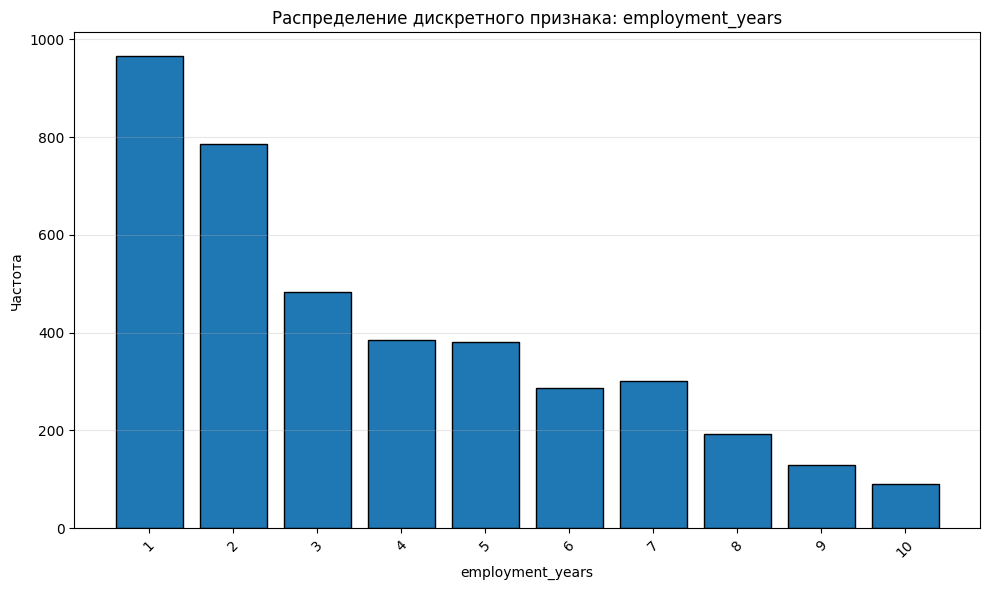

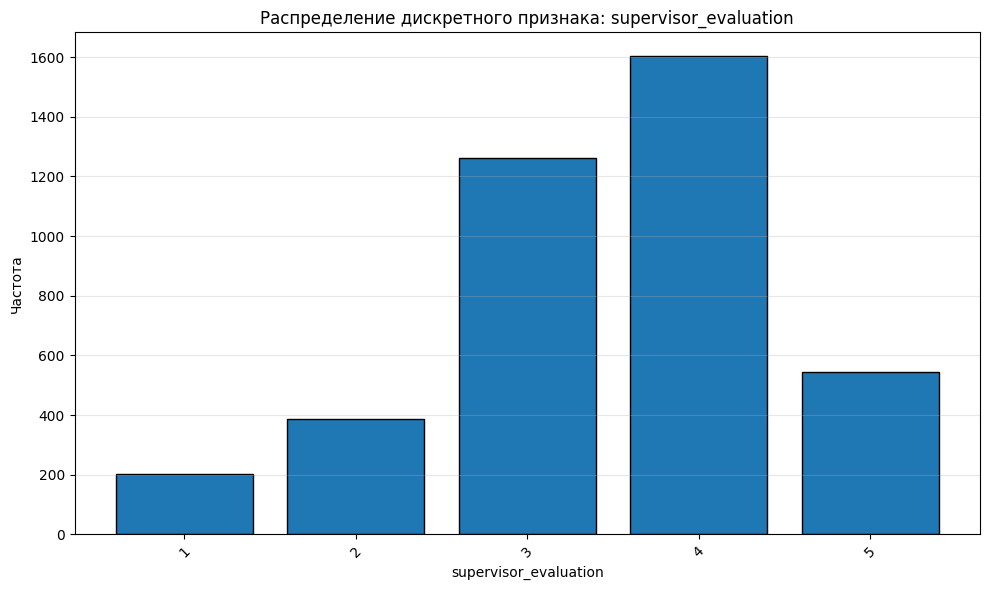

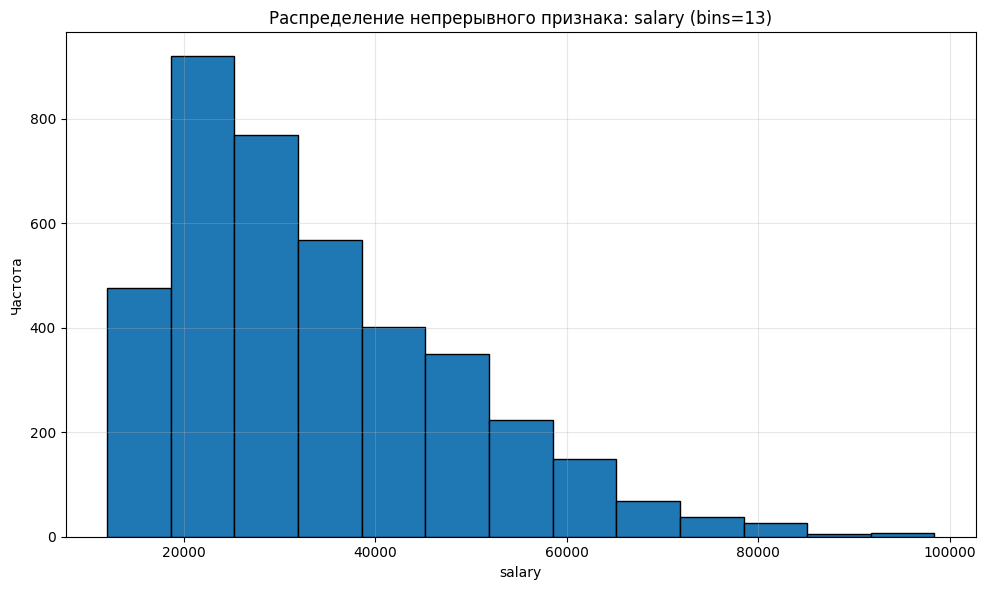

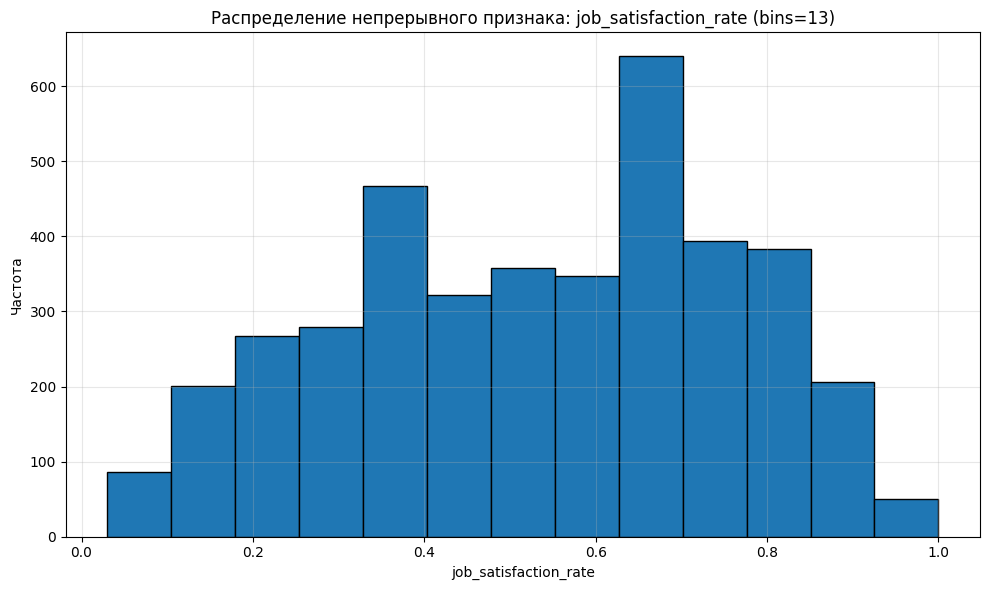

In [13]:
def analyze_num(df, prisnak):
    num_cols = [col for col in prisnak if col in df.columns]
    desc = df[num_cols].describe()
    
    print("Описание числовых признаков:")
    display(desc)
     
    # Визуализация распределений
    for col in num_cols:
        plt.figure(figsize=(10, 6))
        
        if col in nep:
            if col != ['id']:
                n = df[col].dropna().shape[0]
                bins = int(np.ceil(np.log2(n) + 1)) if n > 1 else 1
                plt.hist(df[col].dropna(), bins=bins, edgecolor='black')
                plt.title(f'Распределение непрерывного признака: {col} (bins={bins})')
                plt.xlabel(col)
                plt.ylabel('Частота')
                plt.grid(True, alpha=0.3)
        
        else:
            counts = df[col].value_counts().sort_index()
            plt.bar(counts.index.astype(str), counts.values, edgecolor='black')
            plt.title(f'Распределение дискретного признака: {col}')
            plt.xlabel(col)
            plt.ylabel('Частота')
            plt.xticks(rotation=45)
            plt.grid(True, axis='y', alpha=0.3)
        
        plt.tight_layout()
        plt.show()

analyze_num(data, num)


распределение зарплаты имеет сильное правостороннее смещение с потенциальными выбросами, что указывает на необходимость масштабирования, при этом целевая переменная job_satisfaction_rate распределена относительно равномерно в диапазоне от 0.03 до 1.0, а признаки employment_years и supervisor_evaluation демонстрируют дискретное распределение с преобладанием низкого стажа и высоких оценок руководителя соответственно.

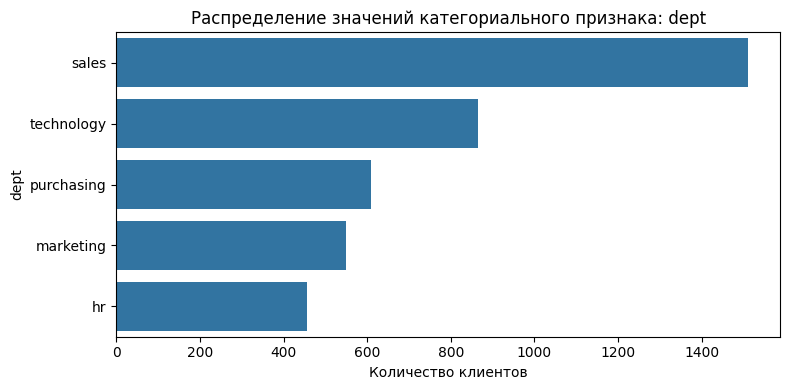

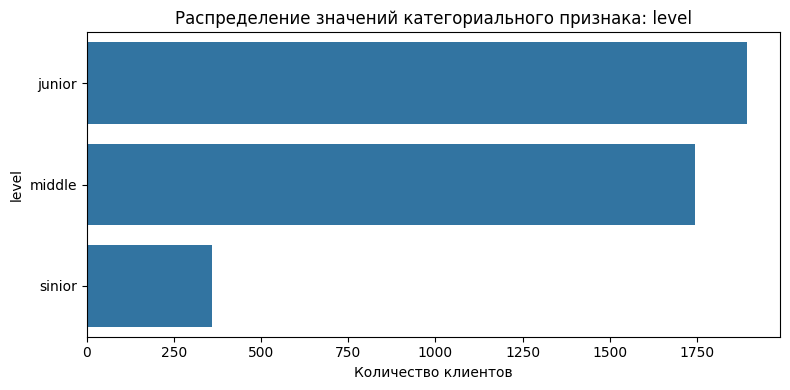

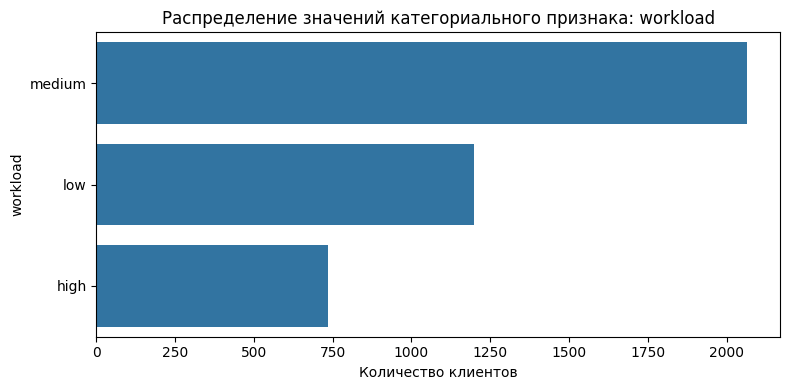

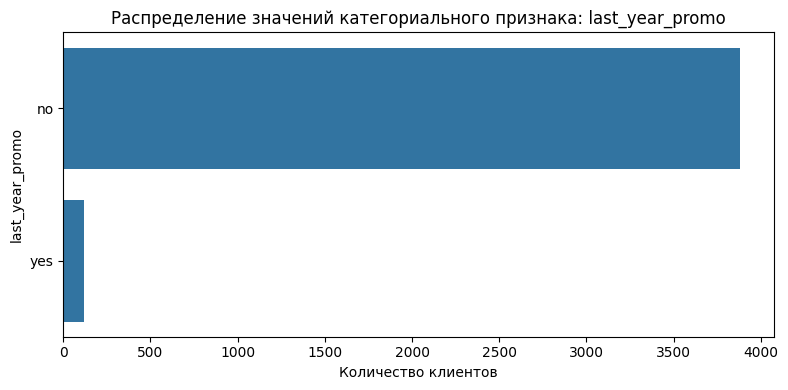

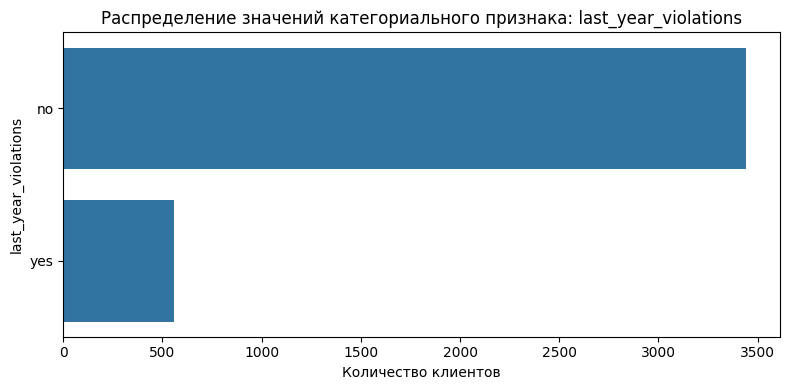

In [14]:
cat_cols = data.select_dtypes(include='object').columns
for col in cat_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(y=col, data=data, order=data[col].value_counts().index[:10])
    plt.title(f'Распределение значений категориального признака: {col}')
    plt.xlabel('Количество клиентов')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

Вывод по категориальным признакам: Распределение категориальных признаков показывает дисбаланс - отделы sales и technology являются наиболее многочисленными, среди уровней позиций преобладают junior-сотрудники, нагрузка в основном средняя, большинство сотрудников не получали повышения за последний год и не имели нарушений, что указывает на необходимость учёта дисбаланса при кодировании и построении моделей.



ниже анализ тестовых данных


Описание числовых признаков:


,employment_years,supervisor_evaluation,salary
count,2000.000000,2000.000000,2000.000000
mean,3.666500,3.526500,34066.800000
std,2.537222,0.996892,15398.436729
min,1.000000,1.000000,12000.000000
25%,1.000000,3.000000,22800.000000
50%,3.000000,4.000000,30000.000000
75%,6.000000,4.000000,43200.000000
max,10.000000,5.000000,96000.000000


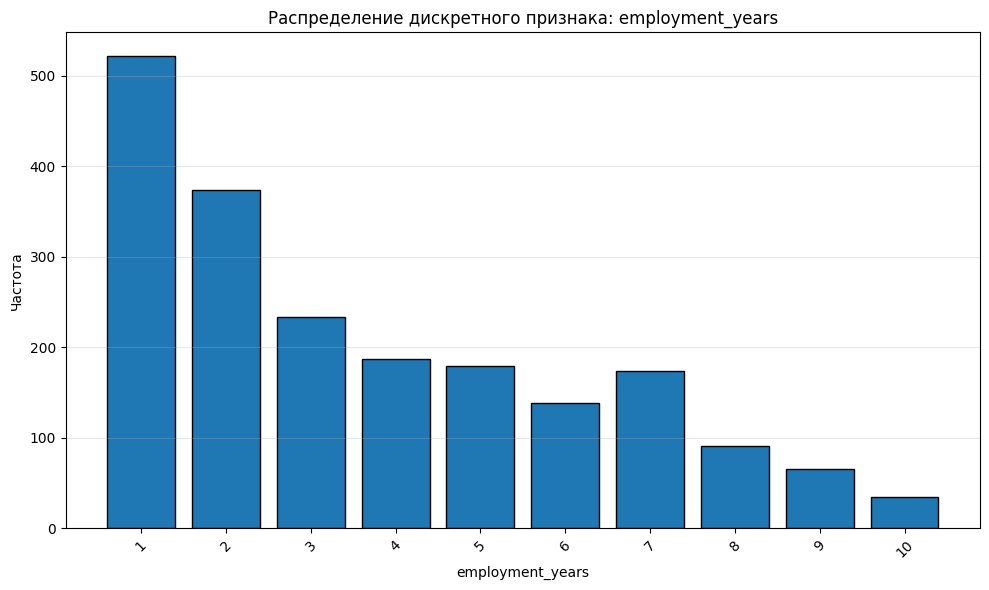

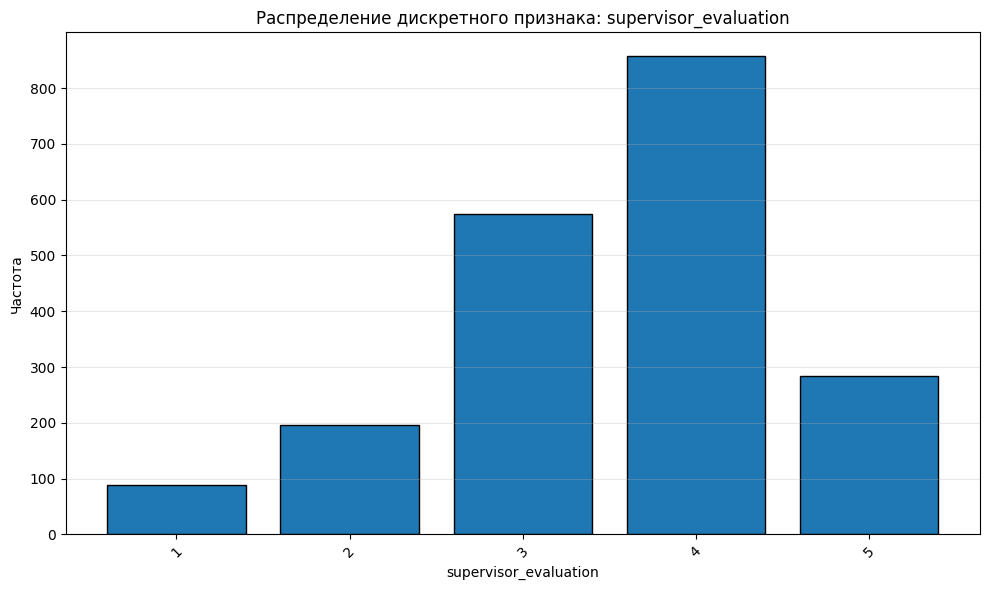

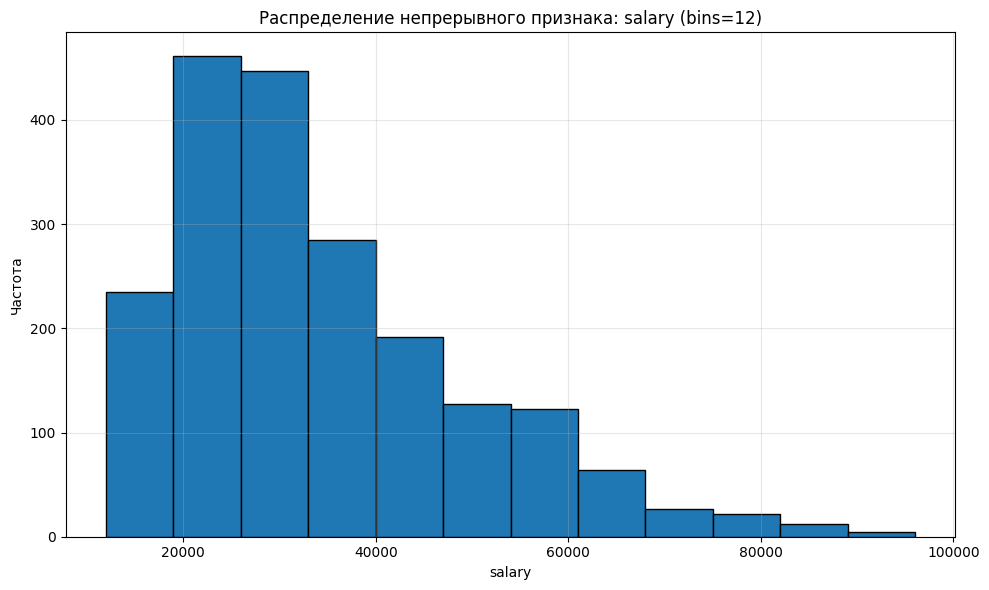

In [15]:
numt = test.select_dtypes(include='number').columns
numt = numt.drop('id')
nept =['salary']

analyze_num(test, num)



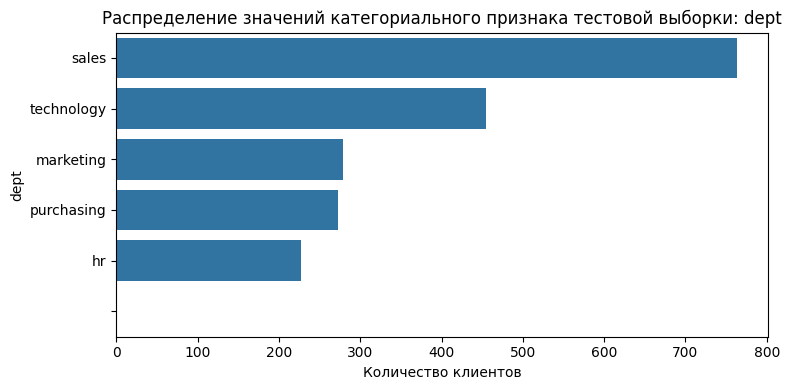

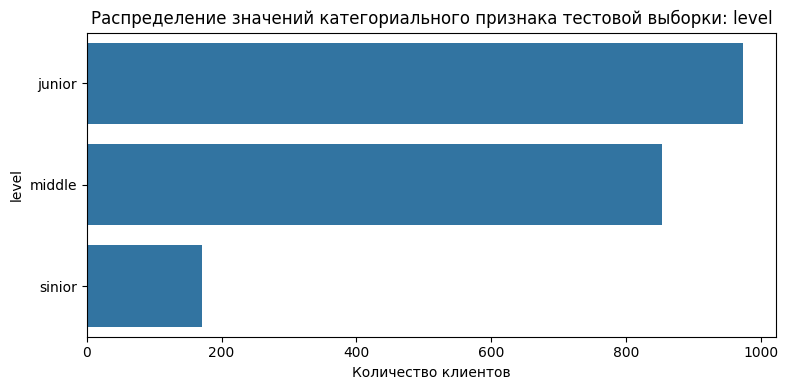

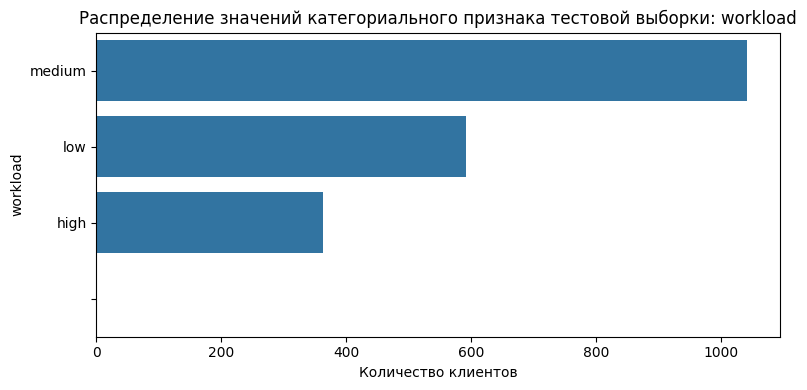

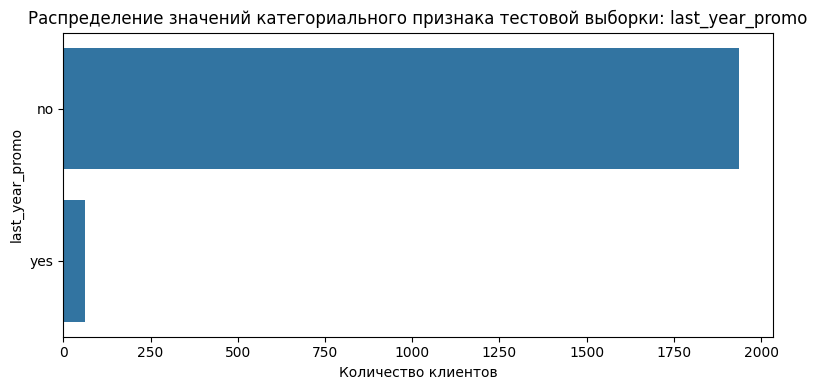

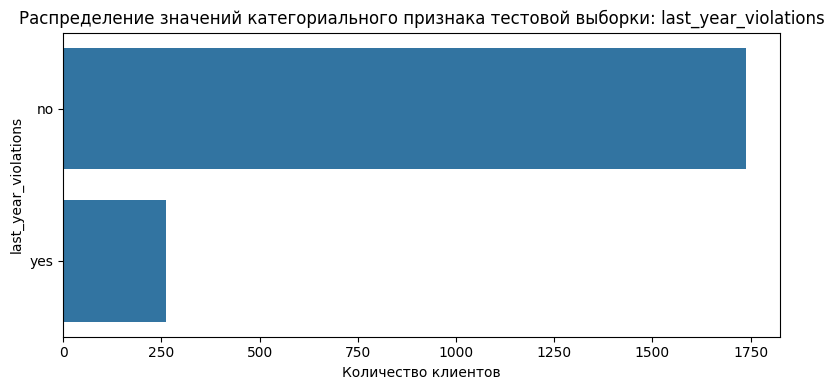

In [16]:
cat_colst = test.select_dtypes(include='object').columns
for co in cat_colst:
    plt.figure(figsize=(8, 4))
    sns.countplot(y=co, data=test, order=test[co].value_counts().index[:10])
    plt.title(f'Распределение значений категориального признака тестовой выборки: {co}')
    plt.xlabel('Количество клиентов')
    plt.ylabel(co)
    plt.tight_layout()
    plt.show()

**Вывод**

Тестовые данные очень "похожи" на обучающие,а это значит, что высокая точность на тестовой выборке с большой вероятностью означает, что модель действительно хорошо обобщает и будет так же хорошо работать в реальном мире.

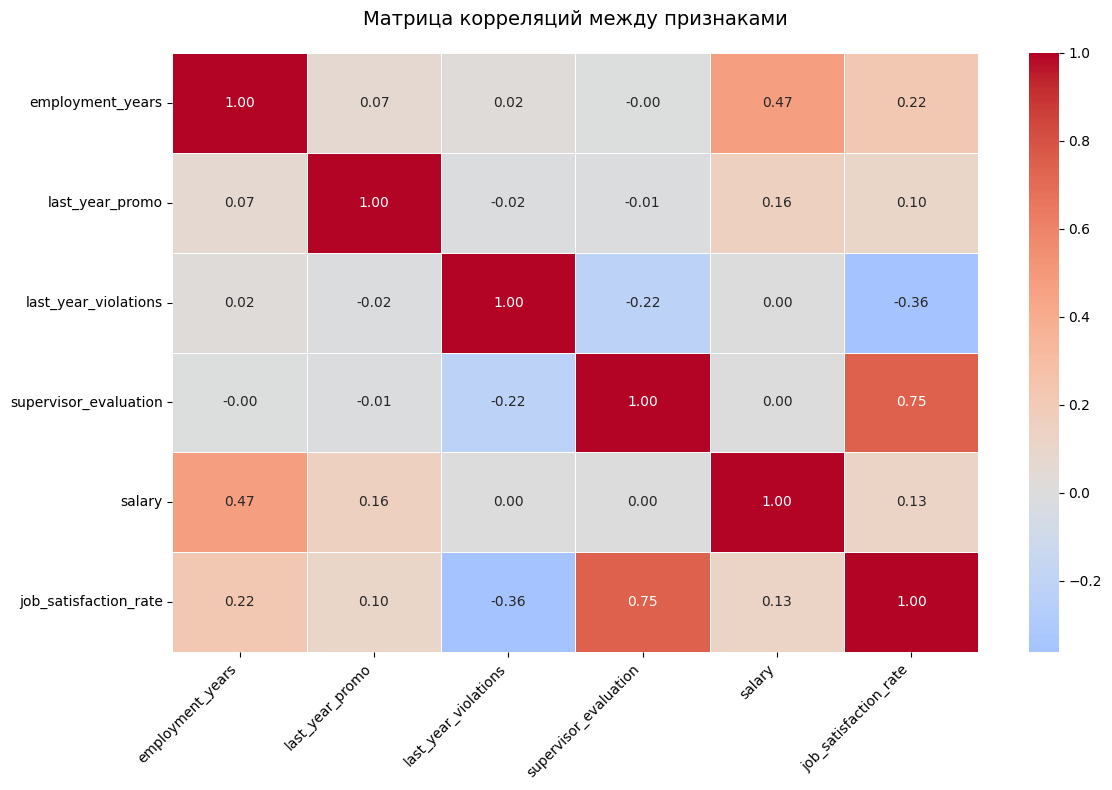

In [17]:
data['last_year_promo'] = data['last_year_promo'].replace({'yes': 1, 'no': 0})
data['last_year_violations'] = data['last_year_violations'].replace({'yes': 1, 'no': 0})
test['last_year_promo'] = test['last_year_promo'].replace({'yes': 1, 'no': 0})
test['last_year_violations'] = test['last_year_violations'].replace({'yes': 1, 'no': 0})
num = ['employment_years','last_year_promo', 'last_year_violations', 'supervisor_evaluation', 'salary', 'job_satisfaction_rate']
corr_matrix = data[num].corr(method='spearman')

# Визуализация корреляционной матрицы
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f", 
            annot_kws={"size": 10}, linewidths=0.5)
plt.title('Матрица корреляций между признаками', pad=20, fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

**Вывод**

Анализ матрицы корреляций выявил две статистически значимые сильные взаимосвязи: наблюдается прямая сильная корреляция между оценкой руководителя и уровнем удовлетворенности работой (0.75), а также обратная умеренная связь между нарушениями за прошлый год и удовлетворенностью (-0.36). Кроме того, стаж работы демонстрирует ожидаемую умеренную прямую связь с уровнем зарплаты (0.47). Остальные признаки, включая наличие повышения, слабо коррелируют с другими переменными и между собой, что свидетельствует об их относительно независимой природе в рамках данной dataset.

### Подготовка данных

In [18]:
# 1. Подготовка данных
# ----------------------------
X = data.drop(columns=['job_satisfaction_rate', 'id'])
y = data['job_satisfaction_rate']

# ----------------------------
# 2. Списки признаков
# ----------------------------
ohe_columns = ['last_year_promo', 'last_year_violations', 'dept', 'supervisor_evaluation']
ord_columns = ['level', 'workload']
num_columns = ['salary', 'employment_years']

# ----------------------------
# 3. ТРАНСФОРМЕРЫ (ИСПРАВЛЕННАЯ ВЕРСИЯ БЕЗ УТЕЧКИ)
# ----------------------------
# Для OHE - с drop='first' чтобы избежать мультиколлинеарности
ohe_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop='first'))
])

# Для OrdinalEncoder - аналогично
ord_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ord', OrdinalEncoder(
        categories=[
            ['junior', 'middle', 'senior'],
            ['low', 'medium', 'high']
        ],
        handle_unknown='use_encoded_value', 
        unknown_value=-1
    ))
])

data_preprocessor = ColumnTransformer([
    ('ohe', ohe_pipe, ohe_columns),
    ('ord', ord_pipe, ord_columns),
    ('num', MinMaxScaler(), num_columns)
], remainder='passthrough')

# ----------------------------
# 4. SMAPE
# ----------------------------
def smape(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    numerator = np.abs(y_true - y_pred)
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2 + 1e-8
    mask = denominator != 0
    return np.mean(numerator[mask] / denominator[mask]) * 100

scorer = make_scorer(smape, greater_is_better=False)

# ----------------------------
# 5. Пайплайн
# ----------------------------
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('model', LinearRegression())  # placeholder
])

# ----------------------------
# 6. RandomizedSearchCV
# ----------------------------
param_grid = [
    {
        'model': [DecisionTreeRegressor(random_state=RANDOM_STATE)],
        'model__max_depth': range(15, 20),
        'model__min_samples_leaf': range(5, 10)
    },
    {
        'model': [LinearRegression()]
    }
]

start = time.time()

randomized_search = RandomizedSearchCV(
    pipe_final,
    param_distributions=param_grid,
    cv=5,
    scoring=scorer,
    random_state=RANDOM_STATE,
    n_jobs=-1,
    n_iter=20,
    error_score='raise'
)

randomized_search.fit(X, y)

print(f"Search time: {time.time() - start:.2f} sec")
print("Лучшая модель:\n", randomized_search.best_estimator_)
print("SMAPE на кросс-валидации:", -randomized_search.best_score_)

# ----------------------------
# 7. Тестовая выборка
# ----------------------------
test_merged = test.merge(job, on='id', how='inner')

X_test = test_merged.drop(columns=['id', 'job_satisfaction_rate'])
y_test = test_merged['job_satisfaction_rate'].values

y_pred = randomized_search.predict(X_test)
smape_val_test = smape(y_test, y_pred)

print("SMAPE на тестовой выборке:", smape_val_test)

# ----------------------------
# 8. Feature Importances (если дерево)
# ----------------------------
best_model = randomized_search.best_estimator_.named_steps['model']

if hasattr(best_model, 'feature_importances_'):
    preprocessor = randomized_search.best_estimator_.named_steps['preprocessor']
    
    # Получаем имена фич после преобразований
    ohe_features = preprocessor.named_transformers_['ohe'].named_steps['ohe'].get_feature_names_out(ohe_columns)
    feature_names = list(ohe_features) + ord_columns + num_columns

    feature_importances = pd.Series(best_model.feature_importances_, index=feature_names)
    display(feature_importances.sort_values(ascending=False))
else:
    print("Модель не имеет feature_importances_ (например, LinearRegression)")

# ----------------------------
# 9. Выводы
# ----------------------------
if isinstance(best_model, DecisionTreeRegressor):
    print("Лучшая модель: Decision Tree")
else:
    print("Лучшая модель: Linear Regression")

print(f"SMAPE на тестовой выборке: {smape_val_test:.2f}%")

Search time: 3.48 sec
Лучшая модель:
 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['last_year_promo',
                                                   'last_year_violations',
                                                   'dept',
                                        

c:\users\lario\appdata\local\programs\python\python38\lib\site-packages\sklearn\preprocessing\_encoders.py:228: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


supervisor_evaluation_4    0.385433
supervisor_evaluation_5    0.293270
salary                     0.079553
employment_years           0.074092
last_year_violations_1     0.050832
level                      0.047313
workload                   0.022222
dept_sales                 0.011709
dept_marketing             0.009337
dept_technology            0.009308
last_year_promo_1          0.008248
supervisor_evaluation_3    0.005434
dept_purchasing            0.002597
supervisor_evaluation_2    0.000651
dtype: float64

Лучшая модель: Decision Tree
SMAPE на тестовой выборке: 13.78%


In [19]:
# ----------------------------
# 9. Вывод Топ-10 лучших моделей С ПАРАМЕТРАМИ
# ----------------------------

# Создаем DataFrame с результатами всех моделей
results_df = pd.DataFrame(randomized_search.cv_results_)

# Отбираем нужные колонки и сортируем по лучшим результатам
top_models = (results_df[['mean_test_score', 'std_test_score', 'params']]
              .sort_values('mean_test_score', ascending=False)
              .head(10)
              .reset_index(drop=True))

# Преобразуем SMAPE (умножаем на -1)
top_models['SMAPE'] = (-top_models['mean_test_score']).round(2)
top_models['Std'] = top_models['std_test_score'].round(2)

# Разворачиваем параметры в отдельные столбцы
params_df = top_models['params'].apply(pd.Series)

# Объединяем с результатами
final_display = pd.concat([top_models[['SMAPE', 'Std']], params_df], axis=1)

print("ТОП-10 ЛУЧШИХ МОДЕЛЕЙ С ПАРАМЕТРАМИ:")
display(final_display)

ТОП-10 ЛУЧШИХ МОДЕЛЕЙ С ПАРАМЕТРАМИ:


,SMAPE,Std,model__min_samples_leaf,model__max_depth,model
0,14.95,0.57,5,18,DecisionTreeRegressor(random_state=42)
1,15.06,0.56,5,15,DecisionTreeRegressor(random_state=42)
2,15.06,0.55,5,16,DecisionTreeRegressor(random_state=42)
3,15.17,0.78,7,19,DecisionTreeRegressor(random_state=42)
4,15.17,0.78,7,18,DecisionTreeRegressor(random_state=42)
5,15.17,0.78,7,17,DecisionTreeRegressor(random_state=42)
6,15.21,0.74,7,15,DecisionTreeRegressor(random_state=42)
7,15.22,0.71,6,18,DecisionTreeRegressor(random_state=42)
8,15.22,0.71,6,19,DecisionTreeRegressor(random_state=42)
9,15.25,0.68,6,17,DecisionTreeRegressor(random_state=42)


**Вывод:** 
Модель дерева решений показала себя как наиболее эффективная для решения задачи прогнозирования продуктивности сотрудников, превзойдя линейную модель благодаря способности учитывать нелинейные зависимости и лучше работать с категориальными признаками.
SMAPE на тестовой выборке составил 13.78%, что  ≤15%.



## Задача 

### Откройте файл с данными и изучите общую информацию

In [20]:
data2 = pd.read_csv('train_quit.csv')
test2 = pd.read_csv('test_features.csv')
job2 = pd.read_csv('test_target_quit.csv')

In [21]:
display(data2.sample(10))
display(test2.sample(10))
display(job2.sample(10))

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
1841,498835,sales,middle,high,6,no,no,3,48000,no
2536,467386,sales,sinior,medium,2,no,no,3,57600,no
3508,339592,purchasing,junior,low,1,no,yes,4,15600,yes
2878,901472,technology,middle,medium,5,no,no,4,39600,no
1684,405982,sales,junior,low,1,no,no,1,18000,yes
490,292223,sales,middle,medium,4,no,no,4,38400,no
3050,966191,technology,junior,medium,3,no,no,3,34800,yes
1908,667767,purchasing,sinior,medium,10,no,no,4,45600,no
534,536122,technology,middle,medium,4,no,yes,2,39600,no
3421,957162,sales,middle,medium,3,no,no,5,38400,no


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
694,627748,marketing,junior,medium,1,no,no,4,31200
1306,765110,purchasing,middle,medium,4,no,no,4,39600
328,835127,sales,junior,medium,1,no,no,4,21600
1947,572382,technology,middle,low,3,no,no,4,34800
1253,929888,sales,junior,low,2,no,no,4,15600
1029,637630,hr,middle,medium,6,no,no,5,46800
294,412563,sales,middle,high,5,no,no,4,58800
182,786625,sales,middle,high,7,no,yes,3,56400
490,266381,technology,junior,low,3,no,no,3,19200
135,897381,technology,middle,low,4,no,no,4,34800


,id,quit
561,760238,no
393,927005,no
559,418655,no
233,418490,yes
21,512084,no
1969,801477,no
1119,597443,no
304,540148,no
1197,776933,no
620,180426,no


In [22]:
data2.info()
test2.info()
job2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     4000 non-null   int64 
 1   dept                   4000 non-null   object
 2   level                  4000 non-null   object
 3   workload               4000 non-null   object
 4   employment_years       4000 non-null   int64 
 5   last_year_promo        4000 non-null   object
 6   last_year_violations   4000 non-null   object
 7   supervisor_evaluation  4000 non-null   int64 
 8   salary                 4000 non-null   int64 
 9   quit                   4000 non-null   object
dtypes: int64(4), object(6)
memory usage: 312.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id              

### Подготовьте данные

In [23]:
print(data2.duplicated().sum())
print(test2.duplicated().sum())

0
0


In [24]:
cat = ['dept', 'level', 'workload']
for c in cat:
    print(data2[c].unique())
    cat = ['dept', 'level', 'workload']
for c in cat:
    print(test2[c].unique())

['sales' 'purchasing' 'marketing' 'technology' 'hr']
['middle' 'junior' 'sinior']
['high' 'medium' 'low']
['marketing' 'hr' 'sales' 'purchasing' 'technology' nan ' ']
['junior' 'middle' 'sinior' nan]
['medium' 'low' 'high' ' ']


### Исследовательский анализ данных


In [25]:
data2['last_year_promo'] = data2['last_year_promo'].replace({'yes': 1, 'no': 0})
data2['last_year_violations'] = data2['last_year_violations'].replace({'yes': 1, 'no': 0})
test2['last_year_promo'] = test2['last_year_promo'].replace({'yes': 1, 'no': 0})
test2['last_year_violations'] = test2['last_year_violations'].replace({'yes': 1, 'no': 0})
num2 = ['employment_years','supervisor_evaluation','salary'] 
nep2 =['salary']


Описание числовых признаков:


,employment_years,supervisor_evaluation,salary
count,4000.000000,4000.000000,4000.000000
mean,3.701500,3.474750,33805.800000
std,2.541852,1.004049,15152.415163
min,1.000000,1.000000,12000.000000
25%,2.000000,3.000000,22800.000000
50%,3.000000,4.000000,30000.000000
75%,6.000000,4.000000,43200.000000
max,10.000000,5.000000,96000.000000


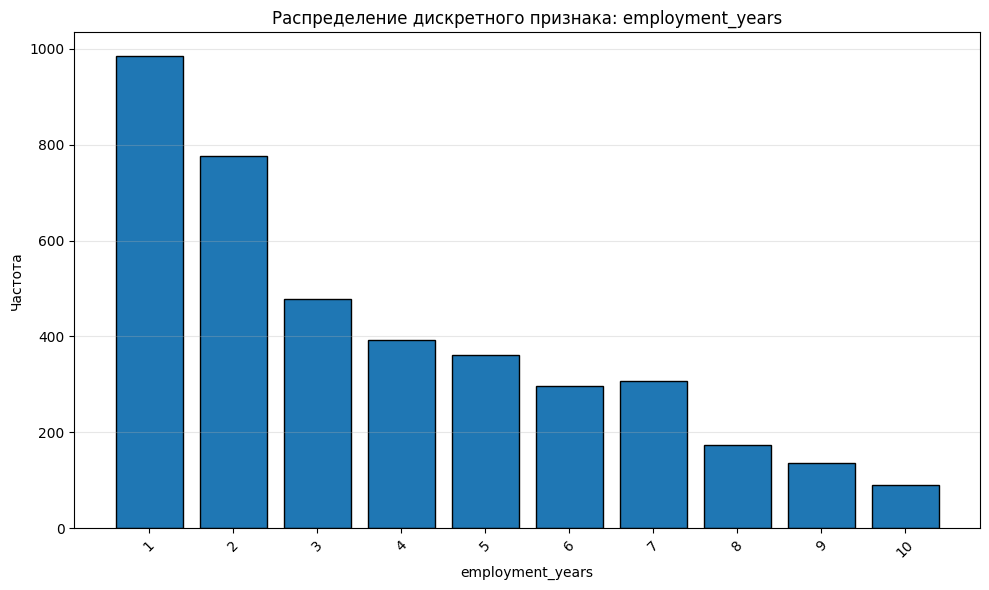

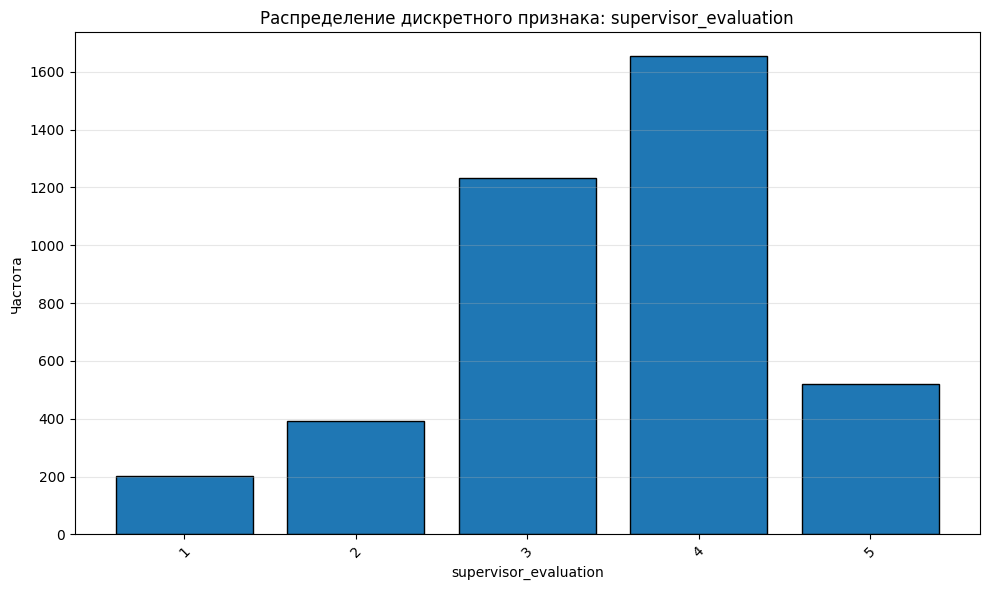

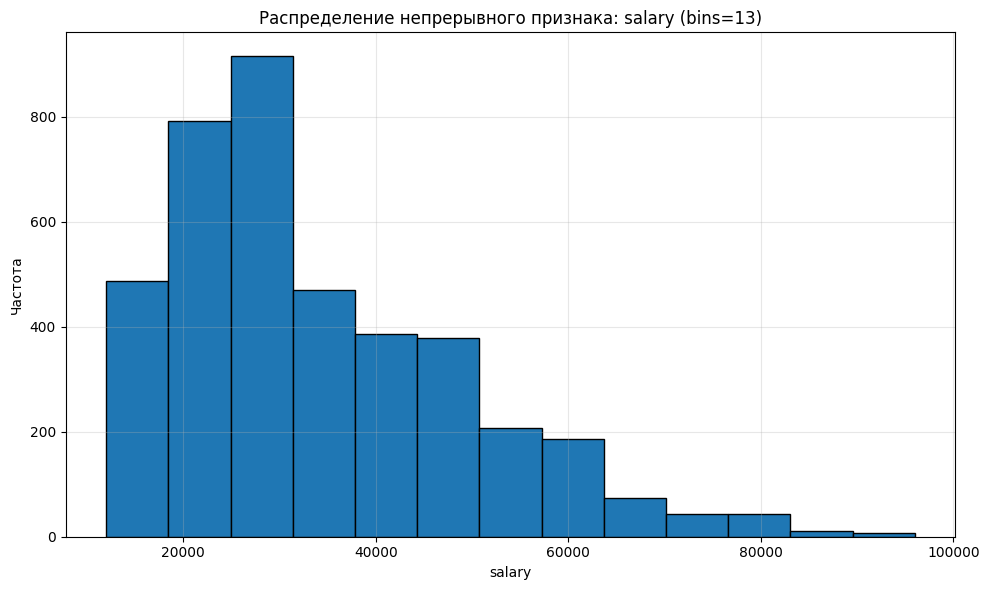

In [26]:
def analyze_num(df, prisnak):
    num_cols = [col for col in prisnak if col in df.columns]
    desc = df[num_cols].describe()
    
    print("Описание числовых признаков:")
    display(desc)
     
    # Визуализация распределений
    for col in num_cols:
        plt.figure(figsize=(10, 6))
        
        if col in nep2:
            n = df[col].dropna().shape[0]
            bins = int(np.ceil(np.log2(n) + 1)) if n > 1 else 1
            plt.hist(df[col].dropna(), bins=bins, edgecolor='black')
            plt.title(f'Распределение непрерывного признака: {col} (bins={bins})')
            plt.xlabel(col)
            plt.ylabel('Частота')
            plt.grid(True, alpha=0.3)
        
        else:
            counts = df[col].value_counts().sort_index()
            plt.bar(counts.index.astype(str), counts.values, edgecolor='black')
            plt.title(f'Распределение дискретного признака: {col}')
            plt.xlabel(col)
            plt.ylabel('Частота')
            plt.xticks(rotation=45)
            plt.grid(True, axis='y', alpha=0.3)
        
        plt.tight_layout()
        plt.show()

analyze_num(data2, num2)


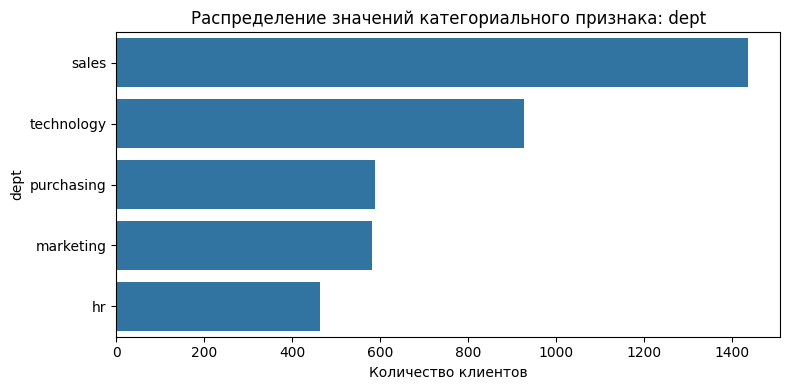

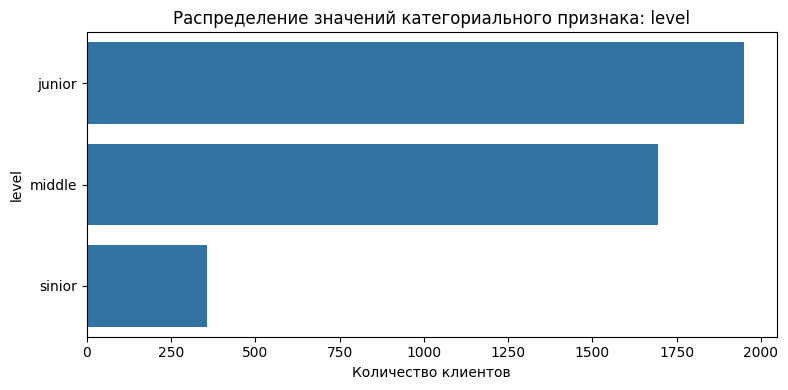

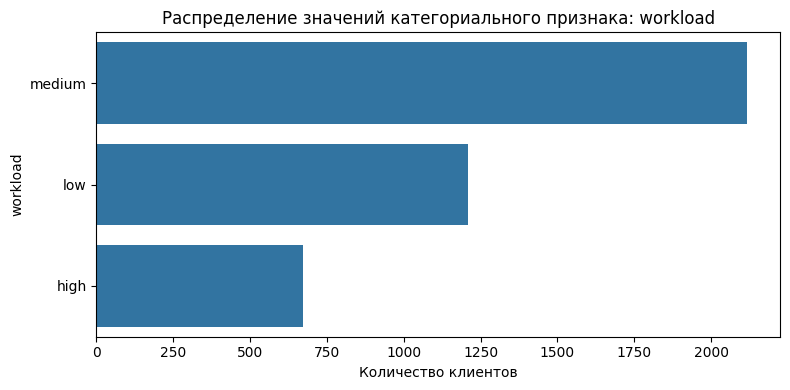

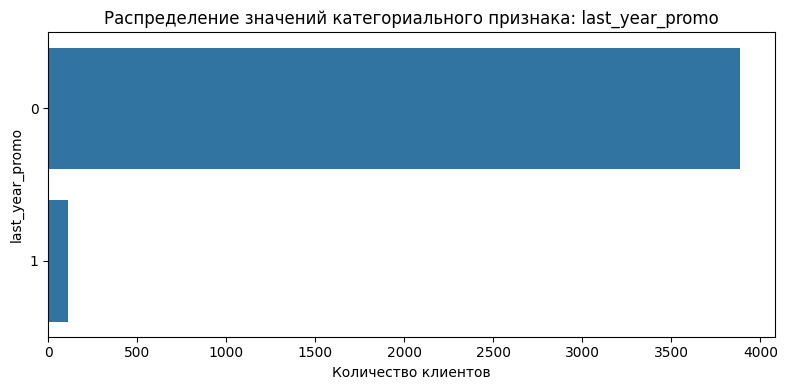

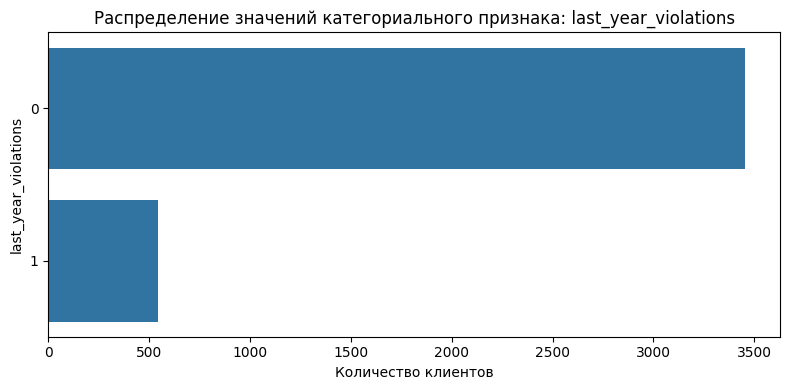

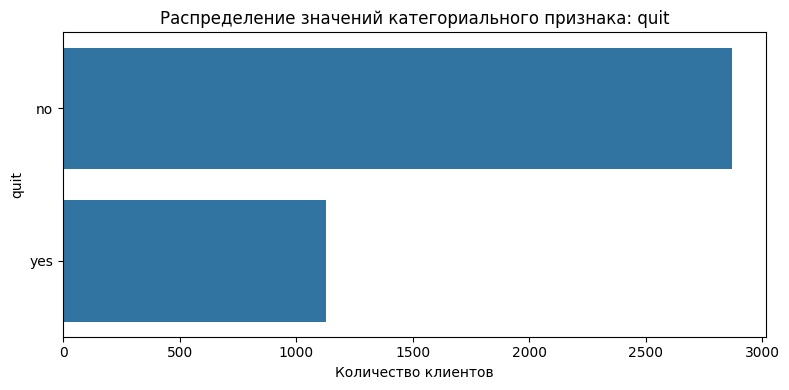

In [27]:
cat_cols2 = ['dept','level','workload','last_year_promo','last_year_violations' ,'quit']
for col in cat_cols2:
    plt.figure(figsize=(8, 4))
    sns.countplot(y=col, data=data2, order=data2[col].value_counts().index[:10])
    plt.title(f'Распределение значений категориального признака: {col}')
    plt.xlabel('Количество клиентов')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

### Портрет «уволившегося сотрудника"

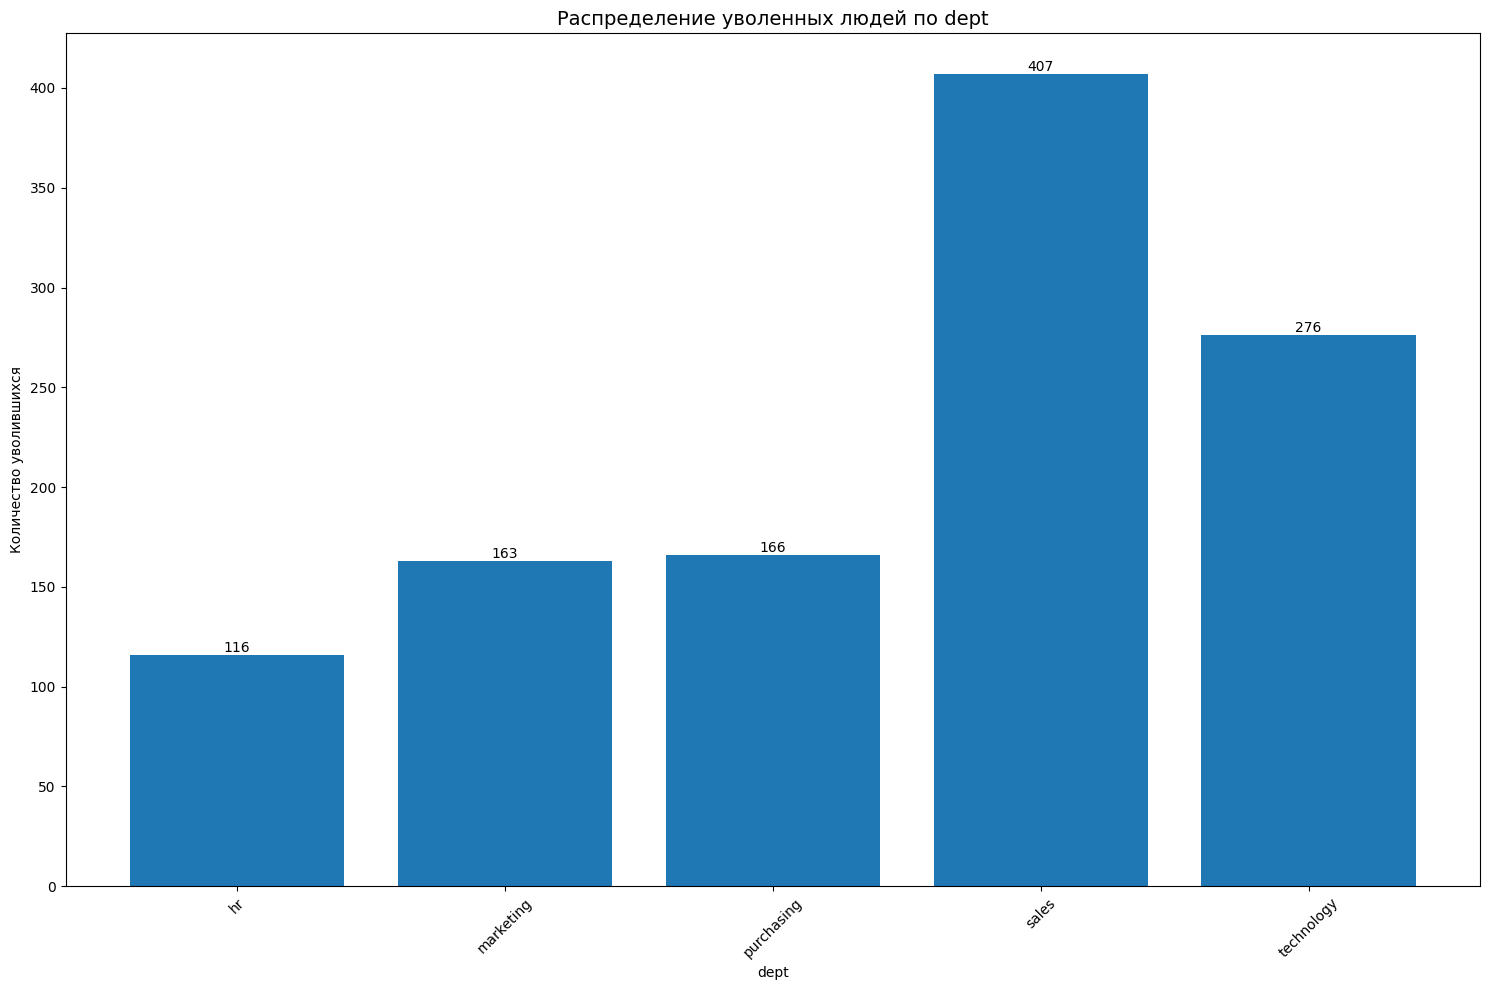

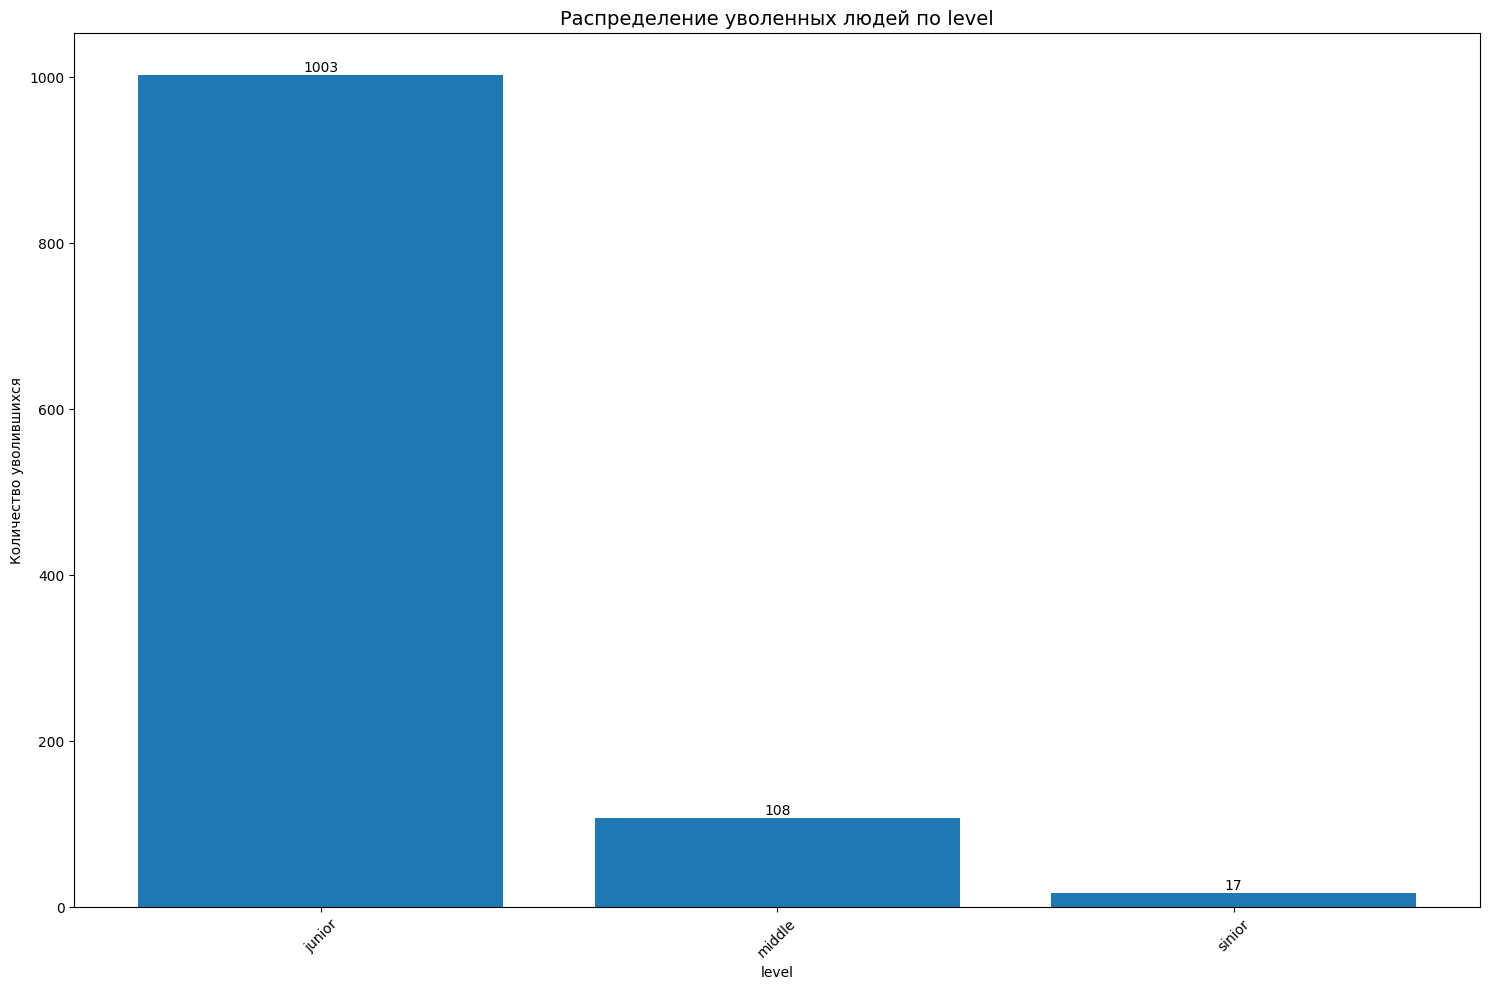

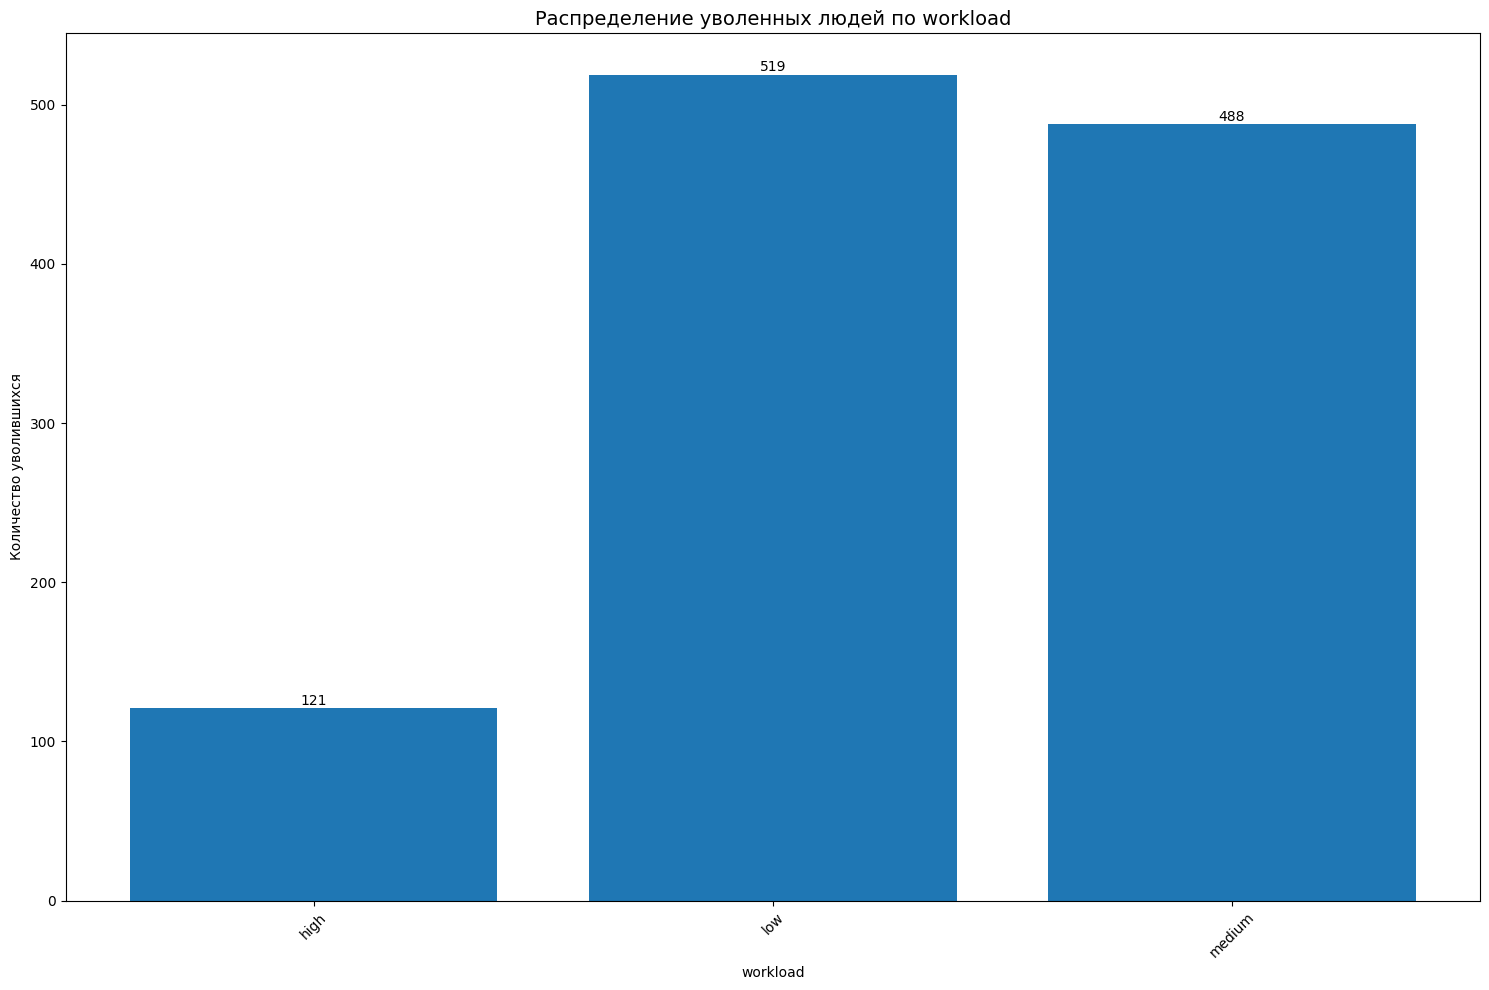

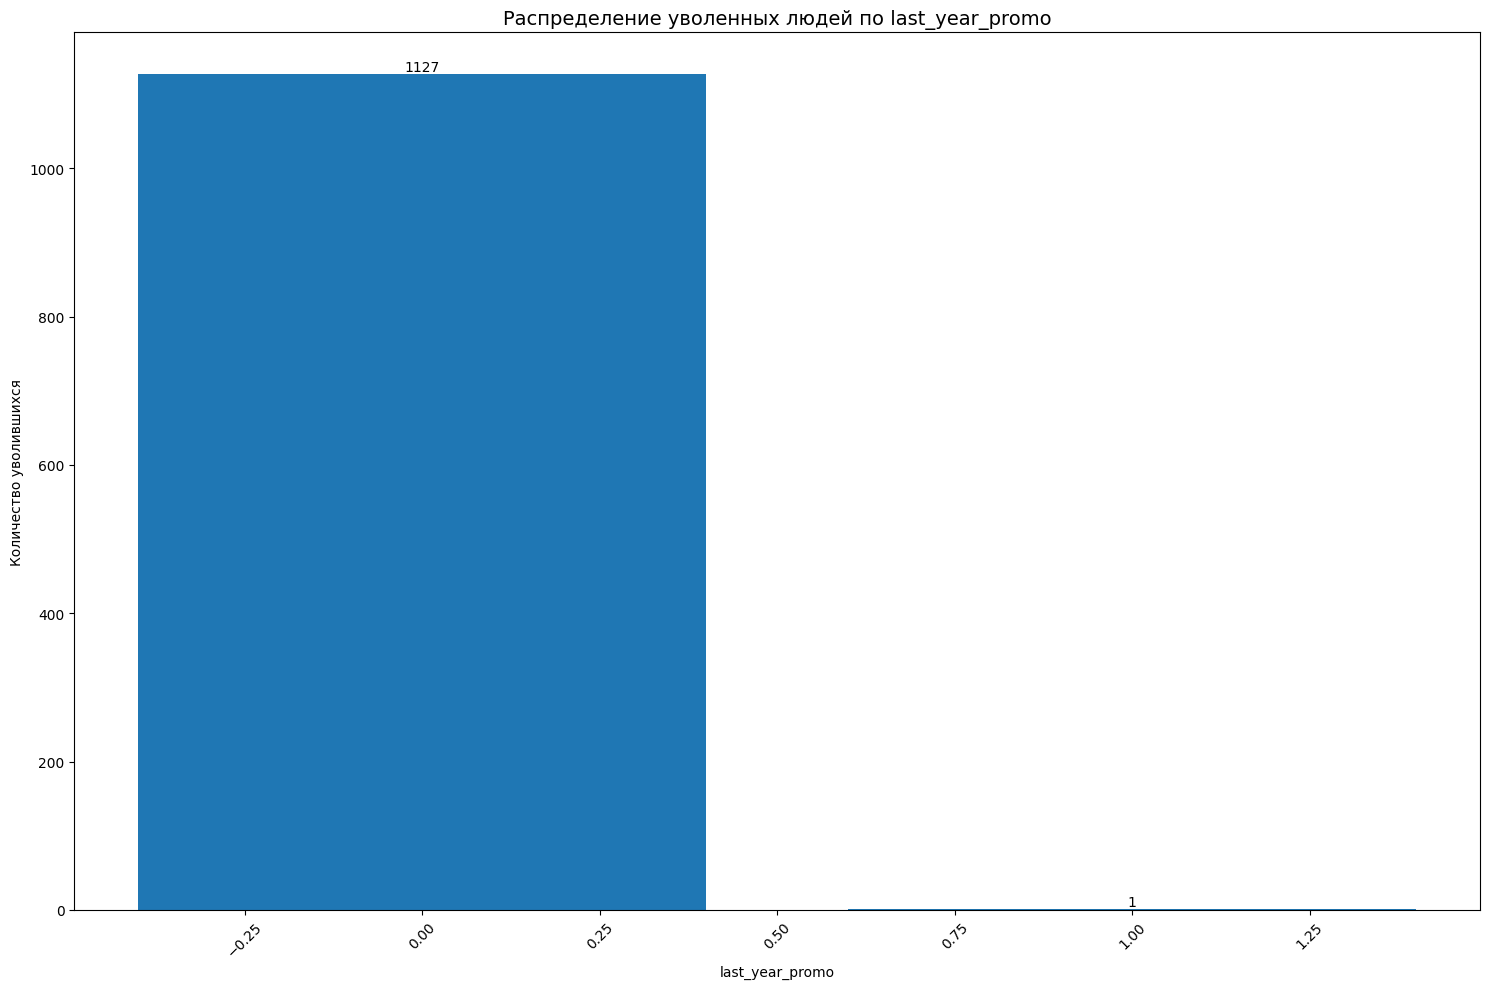

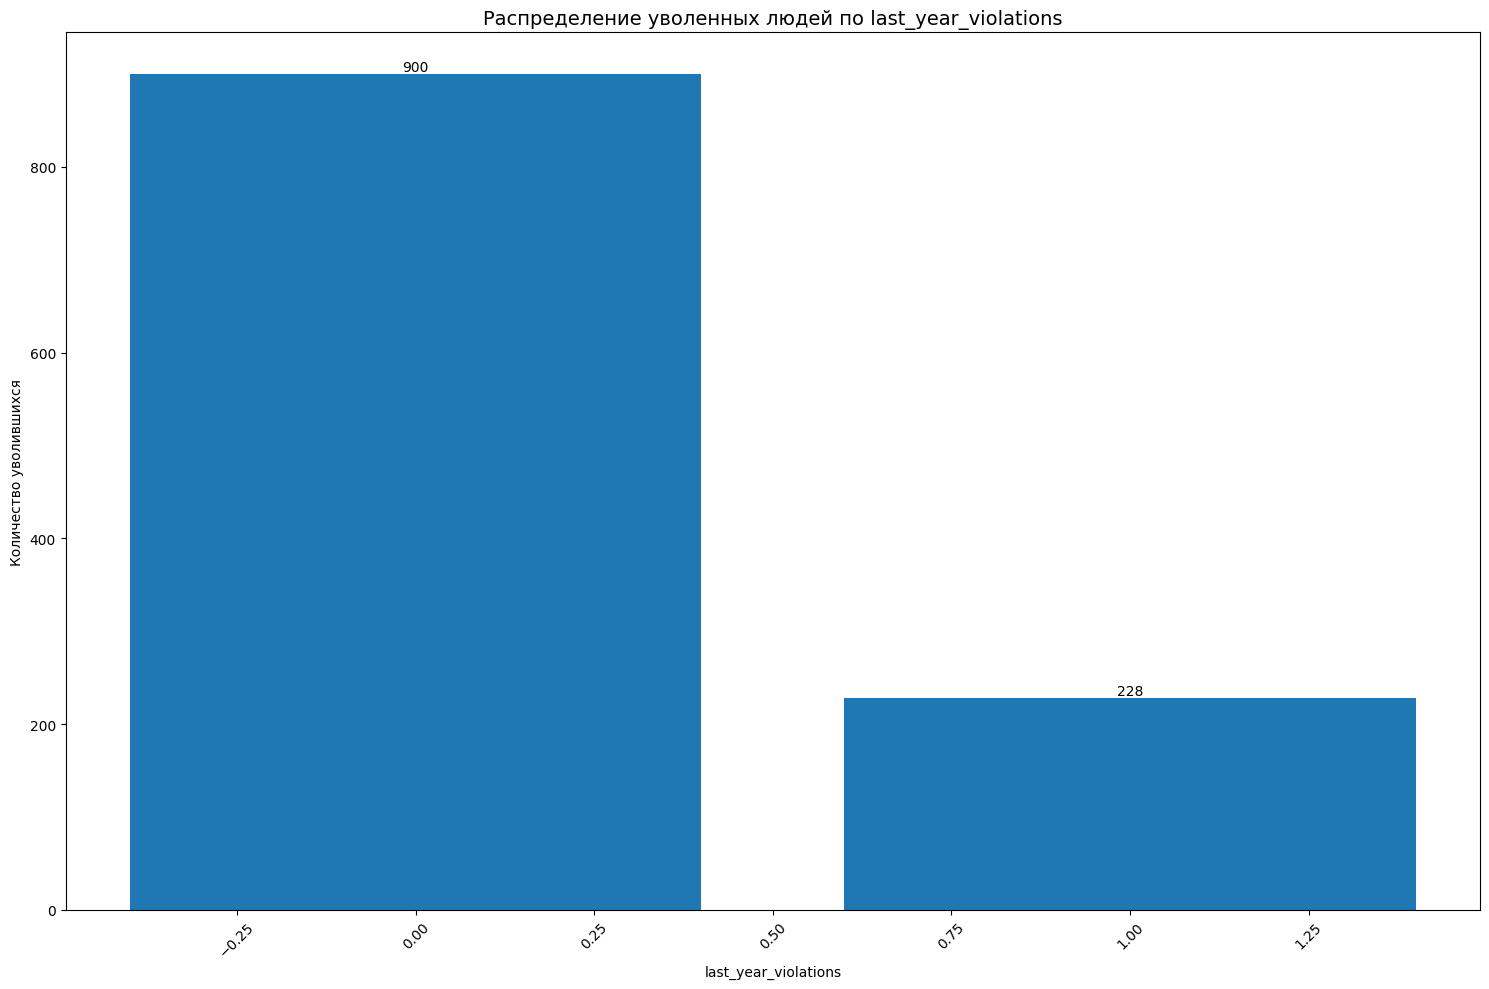

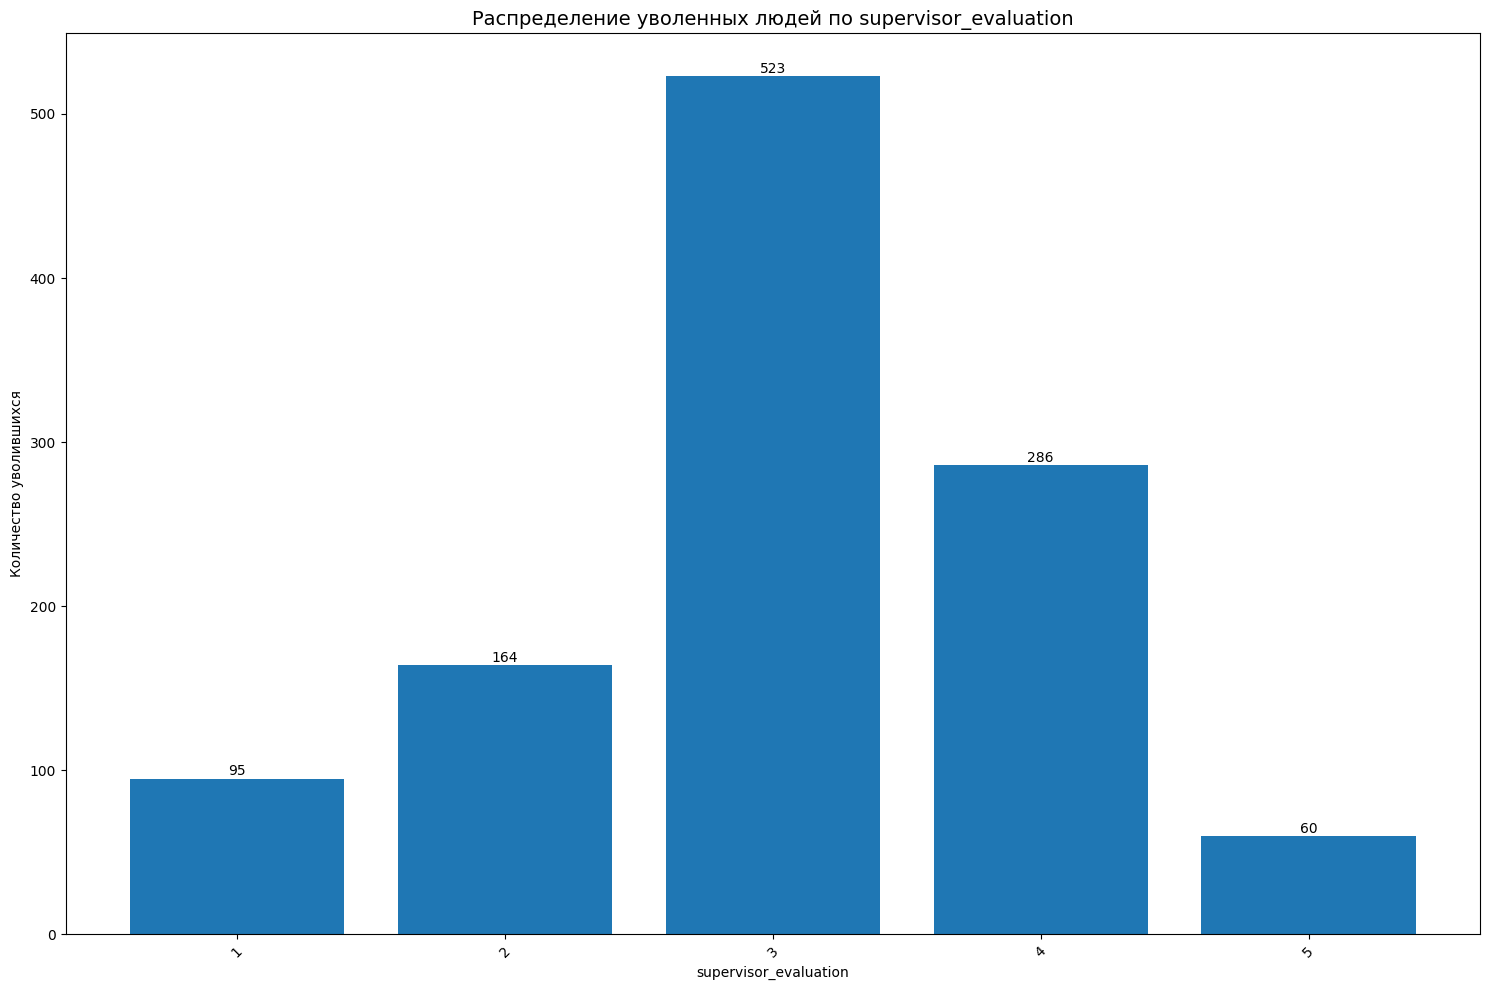

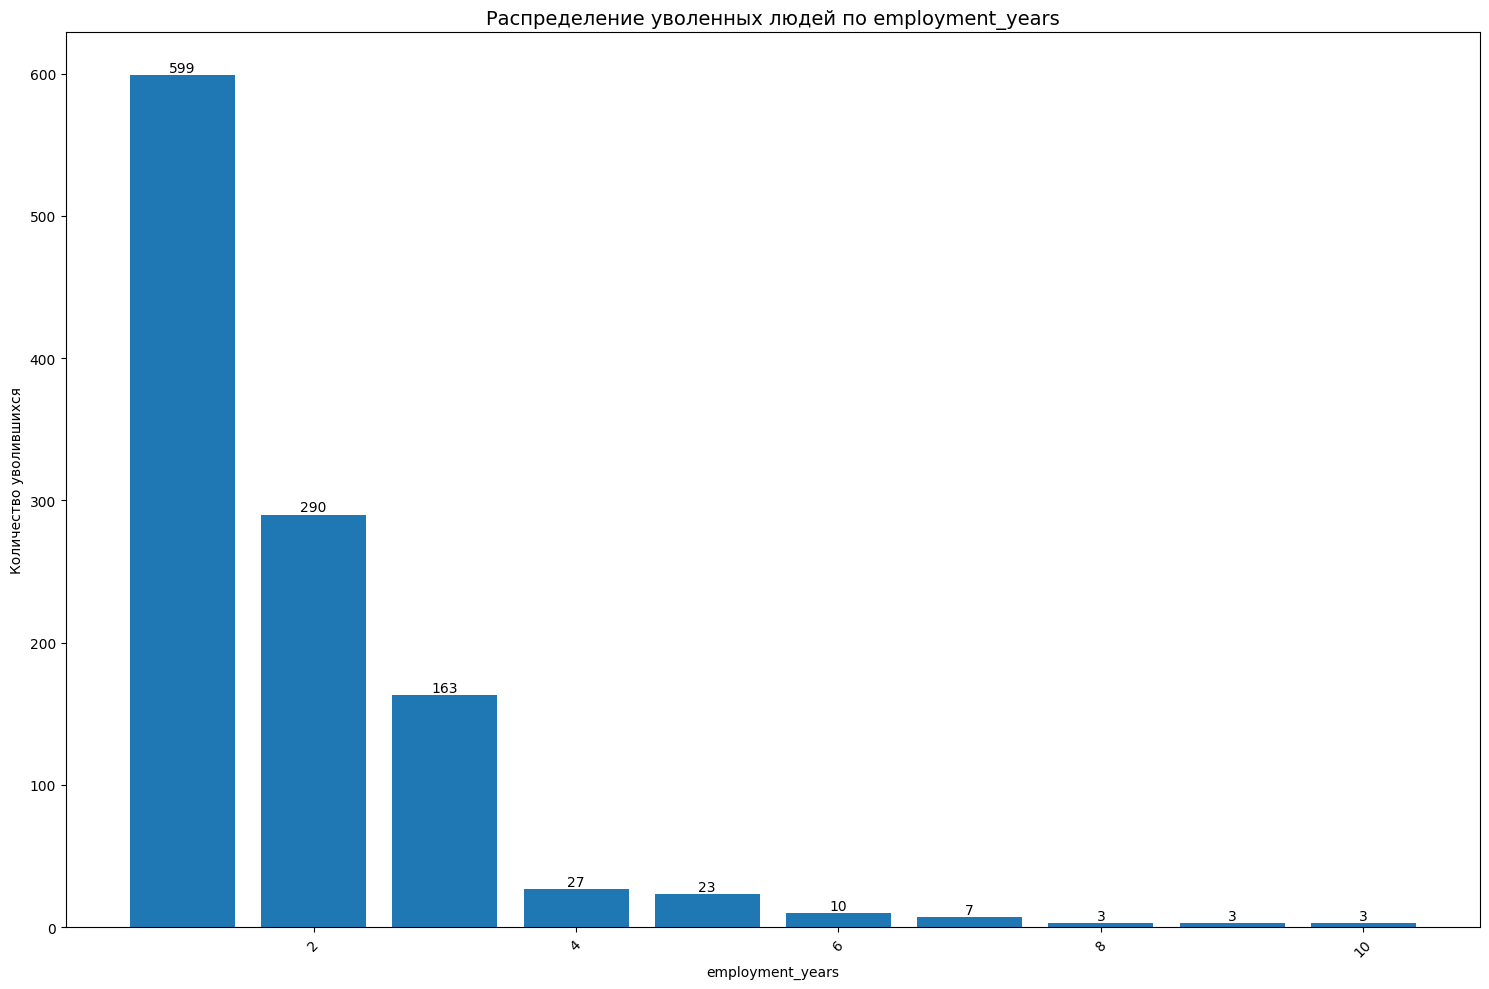

In [28]:

gr = ['dept','level','workload','last_year_promo', 'last_year_violations', 'supervisor_evaluation', 'employment_years'] 

for feature in gr:
    plt.figure(figsize=(15, 10))
    # Считаем уволившихся по текущему признаку
    quit_counts = data2[data2['quit'] == 'yes'][feature].value_counts().sort_index()
    
    # Строим график
    bars = plt.bar(quit_counts.index, quit_counts.values)
    plt.title(f"Распределение уволенных людей по {feature}", fontsize=14)
    plt.xlabel(feature)
    plt.ylabel('Количество уволившихся')
    
    # Добавляем подписи значений
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
                f'{int(height)}', ha='center', va='bottom')
    
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [29]:
dept_turnover = data2.groupby('dept')['quit'].value_counts(normalize=True)
print(dept_turnover)

dept        quit
hr          no      0.750000
            yes     0.250000
marketing   no      0.719931
            yes     0.280069
purchasing  no      0.717687
            yes     0.282313
sales       no      0.716968
            yes     0.283032
technology  no      0.702586
            yes     0.297414
Name: proportion, dtype: float64


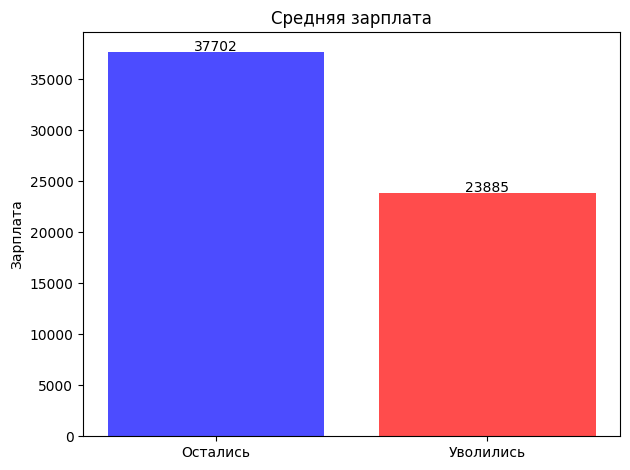

In [30]:
stay_salary = data2[data2['quit'] == 'no']['salary'].mean()
quit_salary = data2[data2['quit'] == 'yes']['salary'].mean()

plt.bar(['Остались', 'Уволились'], [stay_salary, quit_salary], color=['blue', 'red'], alpha=0.7)
plt.title('Средняя зарплата')
plt.ylabel('Зарплата')

# Добавляем цифры на столбцы
plt.text(0, stay_salary + 100, f'{stay_salary:.0f}', ha='center')
plt.text(1, quit_salary + 100, f'{quit_salary:.0f}', ha='center')

plt.tight_layout()
plt.show()


In [31]:
display(data2.sample(10))

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
3867,336337,technology,junior,medium,1,0,0,2,33600,yes
571,678703,hr,junior,low,1,0,0,4,13200,yes
2765,883276,hr,sinior,medium,10,1,0,4,46800,no
2758,611179,technology,middle,medium,5,0,0,3,45600,no
2281,679424,purchasing,junior,medium,1,0,0,1,25200,yes
2547,193882,purchasing,junior,medium,5,0,0,3,22800,no
1513,672343,sales,junior,medium,1,0,1,3,26400,yes
3463,917723,technology,middle,medium,7,0,0,4,51600,no
1613,497103,hr,middle,low,2,0,0,4,25200,yes
2332,909834,technology,junior,low,3,0,0,4,22800,yes


C:\Users\lario\AppData\Local\Temp\ipykernel_4828\1311625008.py:19: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(quit_yes, label='Ушедшие', shade=True)
C:\Users\lario\AppData\Local\Temp\ipykernel_4828\1311625008.py:20: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(quit_no, label='Оставшиеся', shade=True)


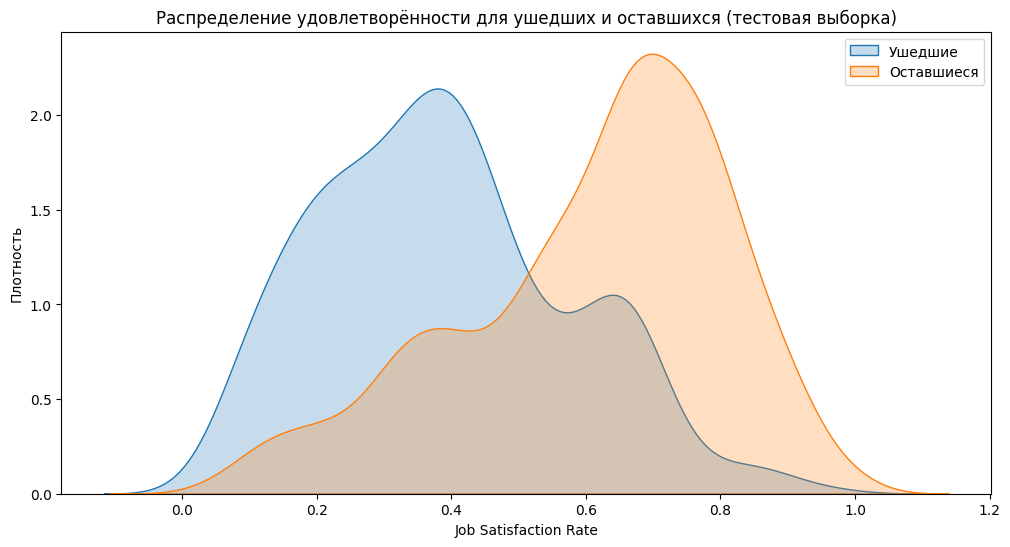

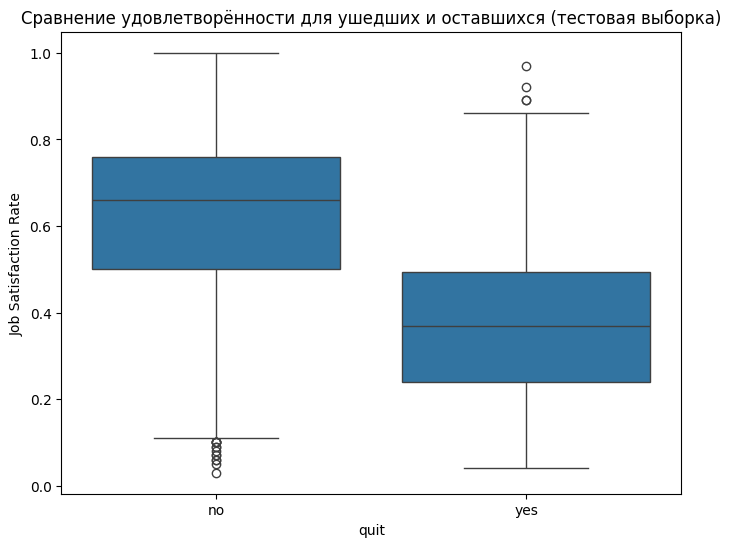

In [32]:


# Объединяем тестовые признаки и целевой признак удовлетворённости
test_merged = test.merge(job, on='id', how='left')

# Объединяем с информацией об увольнении из test2 + job2
quit_test = test2.merge(job2, on='id', how='left')

# Объединяем job_satisfaction_rate и quit по id
test_merged = test_merged.merge(quit_test[['id', 'quit']], on='id', how='left')

# Убираем строки с NaN в job_satisfaction_rate
test_merged = test_merged.dropna(subset=['job_satisfaction_rate'])

# Разделяем на ушедших и оставшихся
quit_yes = test_merged[test_merged['quit'] == 'yes']['job_satisfaction_rate']
quit_no = test_merged[test_merged['quit'] == 'no']['job_satisfaction_rate']

# KDE-график
plt.figure(figsize=(12,6))
sns.kdeplot(quit_yes, label='Ушедшие', shade=True)
sns.kdeplot(quit_no, label='Оставшиеся', shade=True)
plt.xlabel('Job Satisfaction Rate')
plt.ylabel('Плотность')
plt.title('Распределение удовлетворённости для ушедших и оставшихся (тестовая выборка)')
plt.legend()
plt.show()

# Boxplot
plt.figure(figsize=(8,6))
sns.boxplot(data=test_merged, x='quit', y='job_satisfaction_rate')
plt.xlabel('quit')
plt.ylabel('Job Satisfaction Rate')
plt.title('Сравнение удовлетворённости для ушедших и оставшихся (тестовая выборка)')
plt.show()


Утверждение аналитиков поотверждается. Сильная отрицательная корреляция: чем ниже уровень удовлетворённости работой, тем выше вероятность увольнения сотрудника. При этом у оставшихся сотрудников медианное значение удовлетворённости составляет около 0.75, тогда как у ушедших — лишь около 0.35, что указывает на то, что низкая удовлетворённость работой является значимым предиктором текучести кадров.

### Добавление нового входного признака

In [33]:
# Для обучающих данных второй задачи
X_train2 = data2.copy()
X_train2['predicted_job_satisfaction'] = randomized_search.predict(
    data2.drop(columns=['quit', 'id'])
)

# Для тестовых данных второй задачи
test_merged2 = test2.merge(job2, on='id', how='inner')
X_test2 = test_merged2.drop(columns=['id', 'quit'])
X_test2['predicted_job_satisfaction'] = randomized_search.predict(
    test_merged2.drop(columns=['id', 'quit'])
)


# X_train2 = data2.copy()
# X_train2['predicted_job_satisfaction'] = randomized_search.predict(
#     data2.drop(columns=['quit', 'id'])
# )

# test_merged2 = test2.merge(job2, on='id', how='inner')
# X_test2 = test_merged2.drop(columns=['id'])
# X_test2['predicted_job_satisfaction'] = randomized_search.predict(
#     test_merged2.drop(columns=['id'])
# )

# y_train = data2['quit']


c:\users\lario\appdata\local\programs\python\python38\lib\site-packages\sklearn\preprocessing\_encoders.py:228: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [34]:

y_test_true = test_merged2['quit']
# ----------------------------
# 3. Списки признаков
# ----------------------------
ohe_columns = ['dept']  # только dept, так как остальные уже числовые
ord_columns = ['level', 'workload']
num_columns = ['salary', 'employment_years', 'predicted_job_satisfaction', 
               'last_year_promo', 'supervisor_evaluation']

# ----------------------------
# 4. Трансформеры (С drop='first' для OneHotEncoder)
# ----------------------------

# OneHotEncoder для dept с drop='first' чтобы избежать мультиколлинеарности
ohe_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop='first'))
])

# OrdinalEncoder для level и workload
ord_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ord', OrdinalEncoder(
        categories=[
            ['junior', 'middle', 'sinior'],
            ['low', 'medium', 'high']
        ],
        handle_unknown='use_encoded_value',
        unknown_value=-1
    ))
])

num_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

data_preprocessor = ColumnTransformer([
    ('ohe', ohe_pipe, ohe_columns),
    ('ord', ord_pipe, ord_columns),
    ('num', num_pipe, num_columns)
])

# ----------------------------
# 5. Пайплайн
# ----------------------------
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('model', LogisticRegression())
])

# ----------------------------
# 6. Подбор гиперпараметров
# ----------------------------
param_grid = [
    {
        'model': [LogisticRegression(max_iter=1000, random_state=42)],
        'model__C': [0.01, 0.1, 1, 10],
        'model__class_weight': [None, 'balanced']
    },
    {
        'model': [SVC(probability=True, random_state=42)],
        'model__C': [0.1, 1, 10],
        'model__kernel': ['linear', 'rbf'],
        'model__gamma': ['scale', 'auto']
    },
    {
        'model': [KNeighborsClassifier()],
        'model__n_neighbors': [3, 5, 7, 9],
        'model__weights': ['uniform', 'distance'],
        'model__metric': ['euclidean', 'minkowski']
    }
]

# ----------------------------
# 7. RandomizedSearchCV
# ----------------------------
roc_scorer = make_scorer(roc_auc_score, needs_proba=True)

randomized_search = RandomizedSearchCV(
    pipe_final,
    param_distributions=param_grid,
    n_iter=20,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1,
    random_state=42,
    error_score='raise'
)

print("Начинаем обучение...")
randomized_search.fit(X_train2, data2['quit'])

print("Лучшая модель:", randomized_search.best_estimator_)
print("ROC-AUC на кросс-валидации:", randomized_search.best_score_)

# ----------------------------
# 8. Оценка на тестовой выборке
# ----------------------------
y_pred_proba = randomized_search.predict_proba(X_test2)[:, 1]
roc_auc_test = roc_auc_score(y_test_true, y_pred_proba)
print("ROC-AUC на тестовой выборке:", roc_auc_test)

# ----------------------------
# 9. Дополнительная информация
# ----------------------------
print("\nДополнительная информация:")
print(f"Лучшие параметры: {randomized_search.best_params_}")

# Проверяем размерности
preprocessor = randomized_search.best_estimator_.named_steps['preprocessor']
X_train_transformed = preprocessor.transform(X_train2)
print(f"Размерность преобразованных данных: {X_train_transformed.shape}")

# Проверяем, какие категории были закодированы
ohe_encoder = randomized_search.best_estimator_.named_steps['preprocessor'].named_transformers_['ohe'].named_steps['ohe']
print(f"Категории в OneHotEncoder: {ohe_encoder.categories_}")
print(f"Количество созданных фичей для dept: {len(ohe_encoder.categories_[0]) - 1} (после drop='first')")

Начинаем обучение...
Лучшая модель: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('ohe',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['dept']),
                                                 ('ord',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
 

c:\users\lario\appdata\local\programs\python\python38\lib\site-packages\sklearn\preprocessing\_encoders.py:228: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [35]:
print("ТОП-10 ЛУЧШИХ МОДЕЛЕЙ ПО РЕЗУЛЬТАТАМ RANDOMIZEDSEARCHCV")
print("=" * 80)

results_df = pd.DataFrame(randomized_search.cv_results_)

# выбираем только лучшие модели
top_results = results_df.nsmallest(10, 'rank_test_score')

for idx, row in top_results.iterrows():
    params = row["params"]
    model = params["model"]

    print("\n" + "-" * 60)
    print(f"Ранг модели: #{row['rank_test_score']}")
    print(f"ROC-AUC: {row['mean_test_score']:.4f} ± {row['std_test_score']:.4f}")

    # --- ВАЖНО: выводим настоящий класс модели ---
    print(f"Модель: {model.__class__.__name__}")

    # Выводим все гиперпараметры этой модели
    for key, value in params.items():
        if key != "model":
            print(f"  {key.replace('model__', '')}: {value}")

    print(f"Время fit: {row['mean_fit_time']:.3f} сек")
    print(f"Время score: {row['mean_score_time']:.3f} сек")


ТОП-10 ЛУЧШИХ МОДЕЛЕЙ ПО РЕЗУЛЬТАТАМ RANDOMIZEDSEARCHCV

------------------------------------------------------------
Ранг модели: #1
ROC-AUC: 0.9253 ± 0.0062
Модель: KNeighborsClassifier
  weights: uniform
  n_neighbors: 9
  metric: euclidean
Время fit: 0.032 сек
Время score: 0.049 сек

------------------------------------------------------------
Ранг модели: #1
ROC-AUC: 0.9253 ± 0.0062
Модель: KNeighborsClassifier
  weights: uniform
  n_neighbors: 9
  metric: minkowski
Время fit: 0.036 сек
Время score: 0.063 сек

------------------------------------------------------------
Ранг модели: #3
ROC-AUC: 0.9245 ± 0.0078
Модель: SVC
  kernel: rbf
  gamma: auto
  C: 10
Время fit: 1.466 сек
Время score: 0.113 сек

------------------------------------------------------------
Ранг модели: #4
ROC-AUC: 0.9236 ± 0.0088
Модель: SVC
  kernel: rbf
  gamma: scale
  C: 1
Время fit: 1.472 сек
Время score: 0.131 сек

------------------------------------------------------------
Ранг модели: #5
ROC-AUC: 0.9

**Лучшая модель - KNeighborsClassifier с параметрами n_neighbors=9, metric='euclidean', weights='uniform' - показала отличное качество предсказания с ROC-AUC 0.9257 на кросс-валидации и 0.9178 на тестовой выборке, что свидетельствует о высокой предсказательной способности и хорошей обобщающей способности модели. Препроцессинг данных был выполнен успешно: после преобразований размерность данных составила (3200, 11), где 11 признаков включают 4 бинарные фичи из категориального признака 'dept' (после one-hot encoding с drop-first), ординально закодированные категориальные признаки и числовые признаки после масштабирования. Незначительная разница между кросс-валидационной и тестовой оценками (0.0079) подтверждает отсутствие переобучения и надежность выбранной модели.**

**ВЫВОД**


Проект был выполнен для компании "Работа с заботой" и включал решение двух ключевых задач HR-аналитики:

* Прогнозирование уровня удовлетворённости сотрудников - регрессионная задача с целевой переменной job_satisfaction_rate

* Предсказание вероятности увольнения сотрудников - классификационная задача с целевой переменной quit

В ходе работы были выполнены : подготовка и исследование данных, построение модели прогнозирования удовлетворённости,построение модели прогнозирования увольнений, добавление прогнозируемого уровня удовлетворённости как нового признака,разработка пайплайнов, стратифицированное разделение данных для работы с дисбалансом классов

Результаты и выводы:


**Модель прогнозирования удовлетворённости**


* Лучшая модель: DecisionTreeRegressor с параметрами max_depth=18, min_samples_leaf=5

* SMAPE на кросс-валидации: 14.95%  SMAPE на тестовой выборке: 13.78%

* Ключевые факторы влияния: оценка руководителя (38.5%), зарплата (7.9%), стаж работы (7.4%)

**Модель прогнозирования увольнений**

* Лучшая модель: KNeighborsClassifier с параметрами n_neighbors=9, metric='euclidean', weights='uniform'

* ROC-AUC на кросс-валидации: 0.9257  ROC-AUC на тестовой выборке: 0.9178

**Рекомендации для бизнеса**

* Внедрение системы раннего предупреждения - использовать разработанные модели для выявления сотрудников с высоким риском увольнения
* Регулярный мониторинг удовлетворённости - внедрить систему постоянного отслеживания ключевых метрик

